In [15]:
import glob
import os
from collections import Counter
import matplotlib.pyplot as plt
import shutil
import json



from preprocessing.paths import READY_MIDI_PATH, DATA_PATH
from preprocessing.file_count import print_files_stats

In [25]:
def count_instruments_by_txt_files(dirname):
    """
    Count the number of .txt files per instrument sorted by instrument_id.
    :param dirname: Root directory containing .txt files.
    :return: Sorted dictionary with instrument_id and counts as values.
    """
    instrument_counts = Counter()
    inst_name = Counter()
    for txt_file in glob.glob(f"{dirname}/**/*.txt", recursive=True):
        base_name = os.path.basename(txt_file)
        parts = base_name.split("_")
        if len(parts) > 3:  # Ensure instrument_id exists
            try:
                instrument_id = int(parts[2])  # Extract instrument_id (assumed numeric)
            except ValueError:
                instrument_id = -1  # Assign -1 for 'None' or invalid instrument_ids
            instrument_counts[instrument_id] += 1
            inst_name[parts[1]] += 1
    print(inst_name)
    return dict(sorted(instrument_counts.items()))


def plot_instrument_distribution(instrument_counts):
    """
    Plot the distribution of .txt files by instrument_id.
    :param instrument_counts: Dictionary with instrument_id and their counts.
    """
    instrument_ids = list(instrument_counts.keys())
    counts = list(instrument_counts.values())

    plt.figure(figsize=(12, 6))
    plt.bar(instrument_ids, counts, color="skyblue")
    plt.xlabel("Instrument ID")
    plt.ylabel("Number of .txt Files")
    plt.title("Distribution of .txt Files by Instrument ID")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


def plot_genre_instrument_distribution(dirname):
    """
    Plot instrument distribution for each genre.
    :param dirname: Root directory containing genres as subdirectories.
    """
    genres = [d for d in glob.glob(f"{dirname}/*") if os.path.isdir(d)]

    for genre in genres:
        genre_name = os.path.basename(genre)
        instrument_counts = count_instruments_by_txt_files(genre)

        if instrument_counts:
            plt.figure(figsize=(12, 6))
            plt.bar(
                instrument_counts.keys(),
                instrument_counts.values(),
                color="lightgreen",
            )
            plt.xlabel("Instrument ID")
            plt.ylabel("Number of .txt Files")
            plt.title(f"Instrument Distribution in Genre: {genre_name}")
            plt.xticks(rotation=45, ha="right")
            plt.tight_layout()
            plt.show()

Counter({'Piano': 18997, 'Electric Guitar': 13028, 'Unknown': 11769, 'StringInstrument': 10933, 'Sampler': 10301, 'Acoustic Guitar': 7326, 'Electric Bass': 6536, 'Electric Piano': 2962, 'Electric Organ': 2708, 'Fretless Bass': 2405, 'Choir': 2382, 'Acoustic Bass': 2274, 'Brass': 2073, 'Voice': 2060, 'Flute': 1527, 'Trumpet': 1279, 'Alto Saxophone': 1202, 'Violin': 1145, 'Trombone': 981, 'Tenor Saxophone': 877, 'Horn': 853, 'Vibraphone': 798, 'Clarinet': 715, 'Oboe': 705, 'Pan Flute': 595, 'Celesta': 590, 'Glockenspiel': 588, 'Harp': 562, 'Timpani': 517, 'Harpsichord': 492, 'Harmonica': 481, 'Violoncello': 456, 'Accordion': 429, 'Bassoon': 428, 'Clavichord': 359, 'Piccolo': 287, 'Pipe Organ': 281, 'Contrabass': 278, 'Baritone Saxophone': 274, 'Viola': 269, 'Soprano Saxophone': 249, 'Tubular Bells': 242, 'Marimba': 242, 'Tuba': 232, 'Ocarina': 232, 'Whistle': 228, 'Recorder': 193, 'Banjo': 144, 'Taiko': 130, 'Tom-Tom': 130, 'English Horn': 128, 'Reed Organ': 125, 'Woodblock': 122, 'Sitar

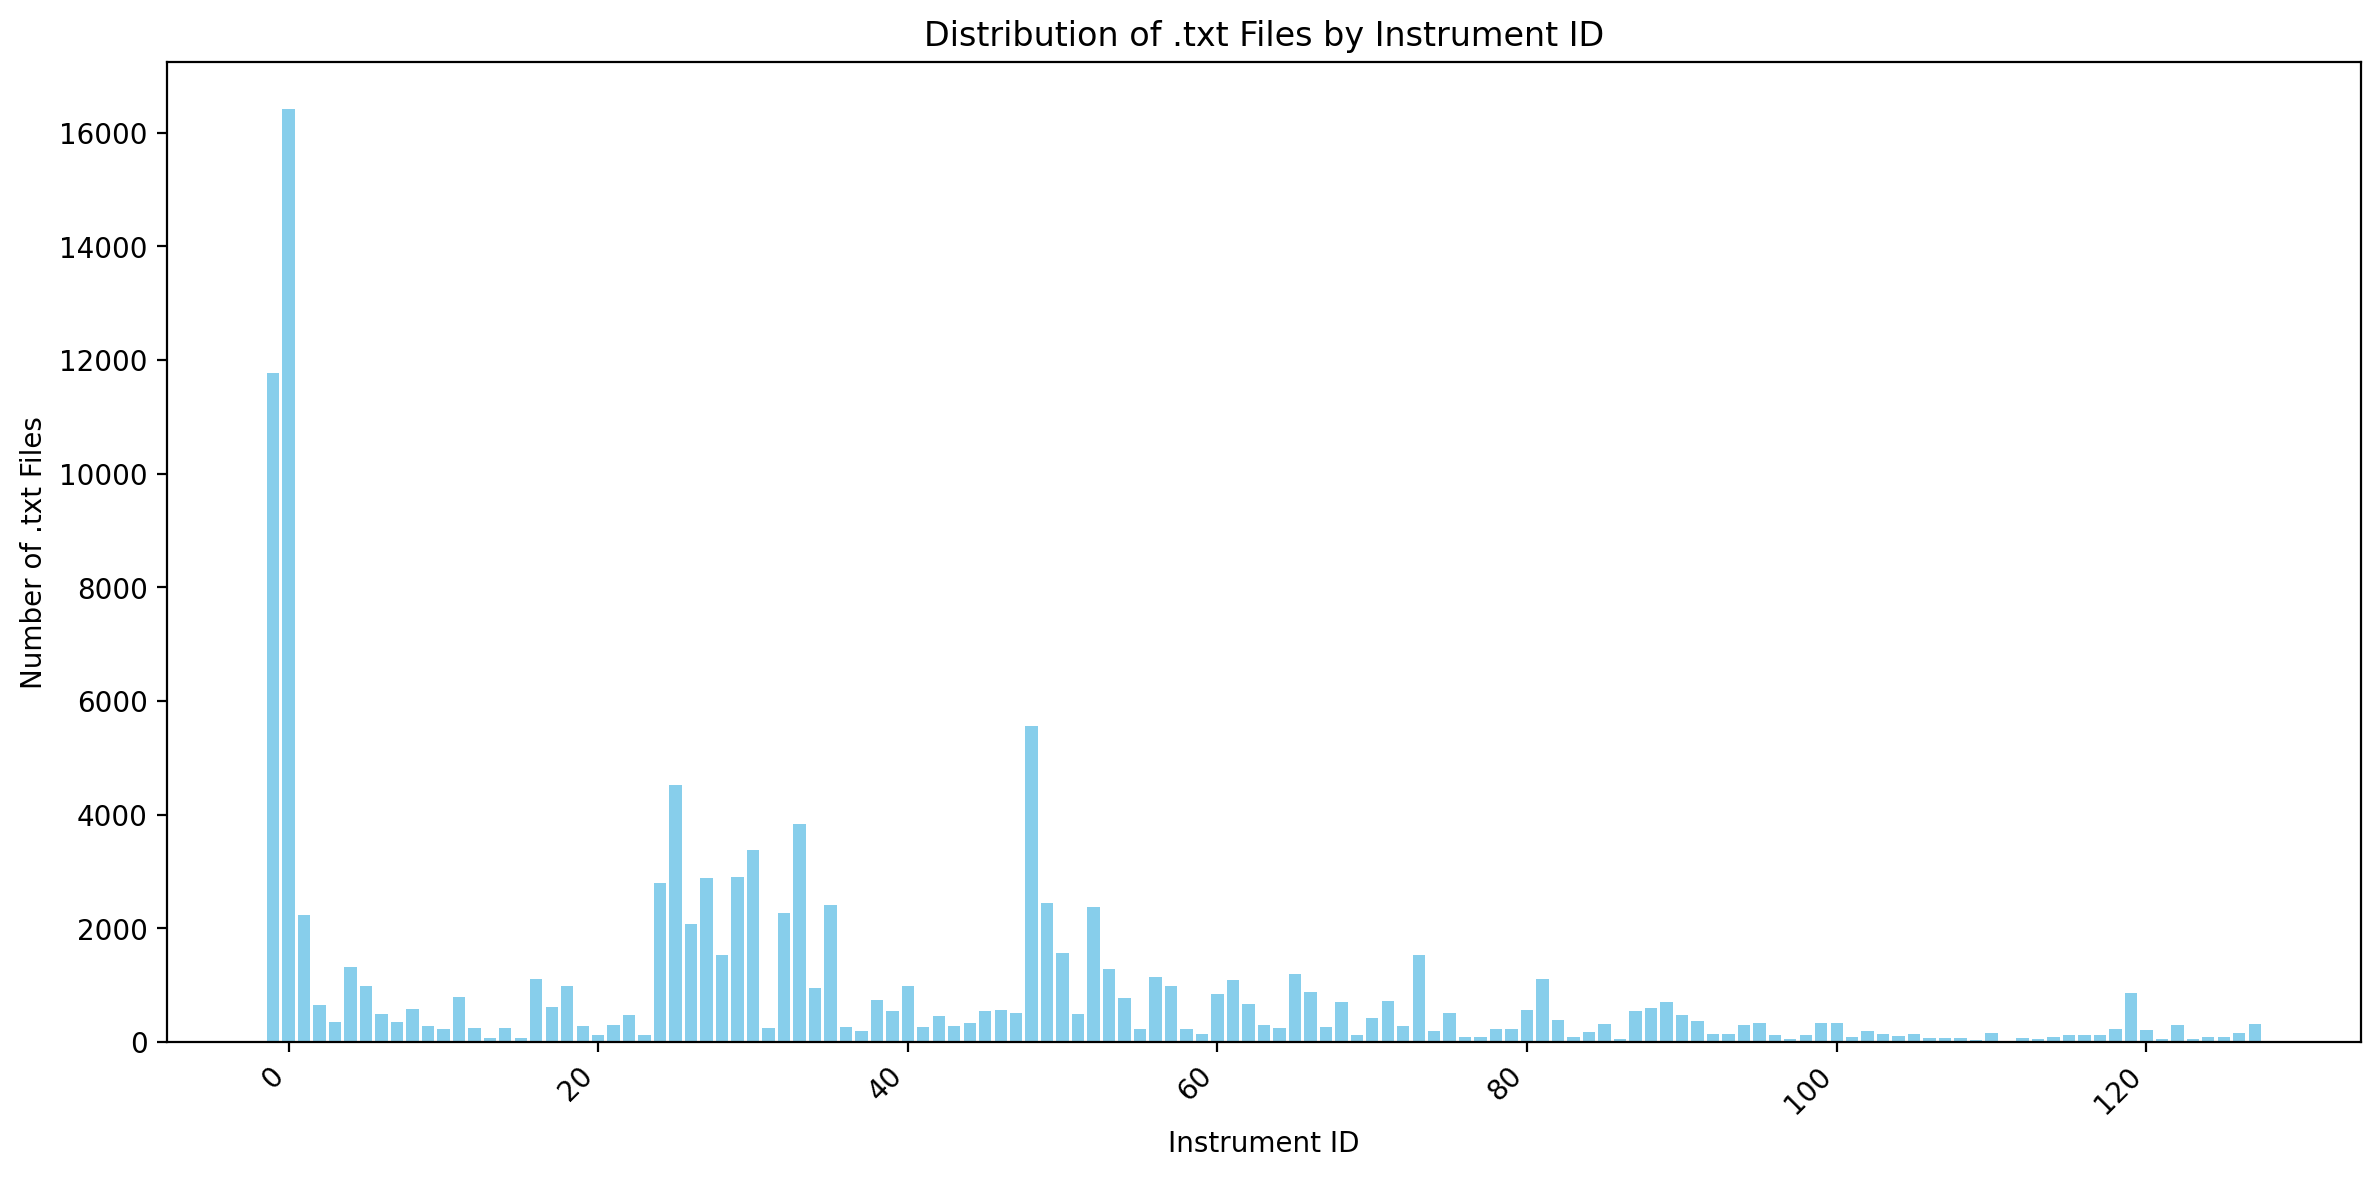

In [26]:
# Count and plot all instruments (sorted by instrument_id)
instrument_counts = count_instruments_by_txt_files(READY_MIDI_PATH)
plot_instrument_distribution(instrument_counts)

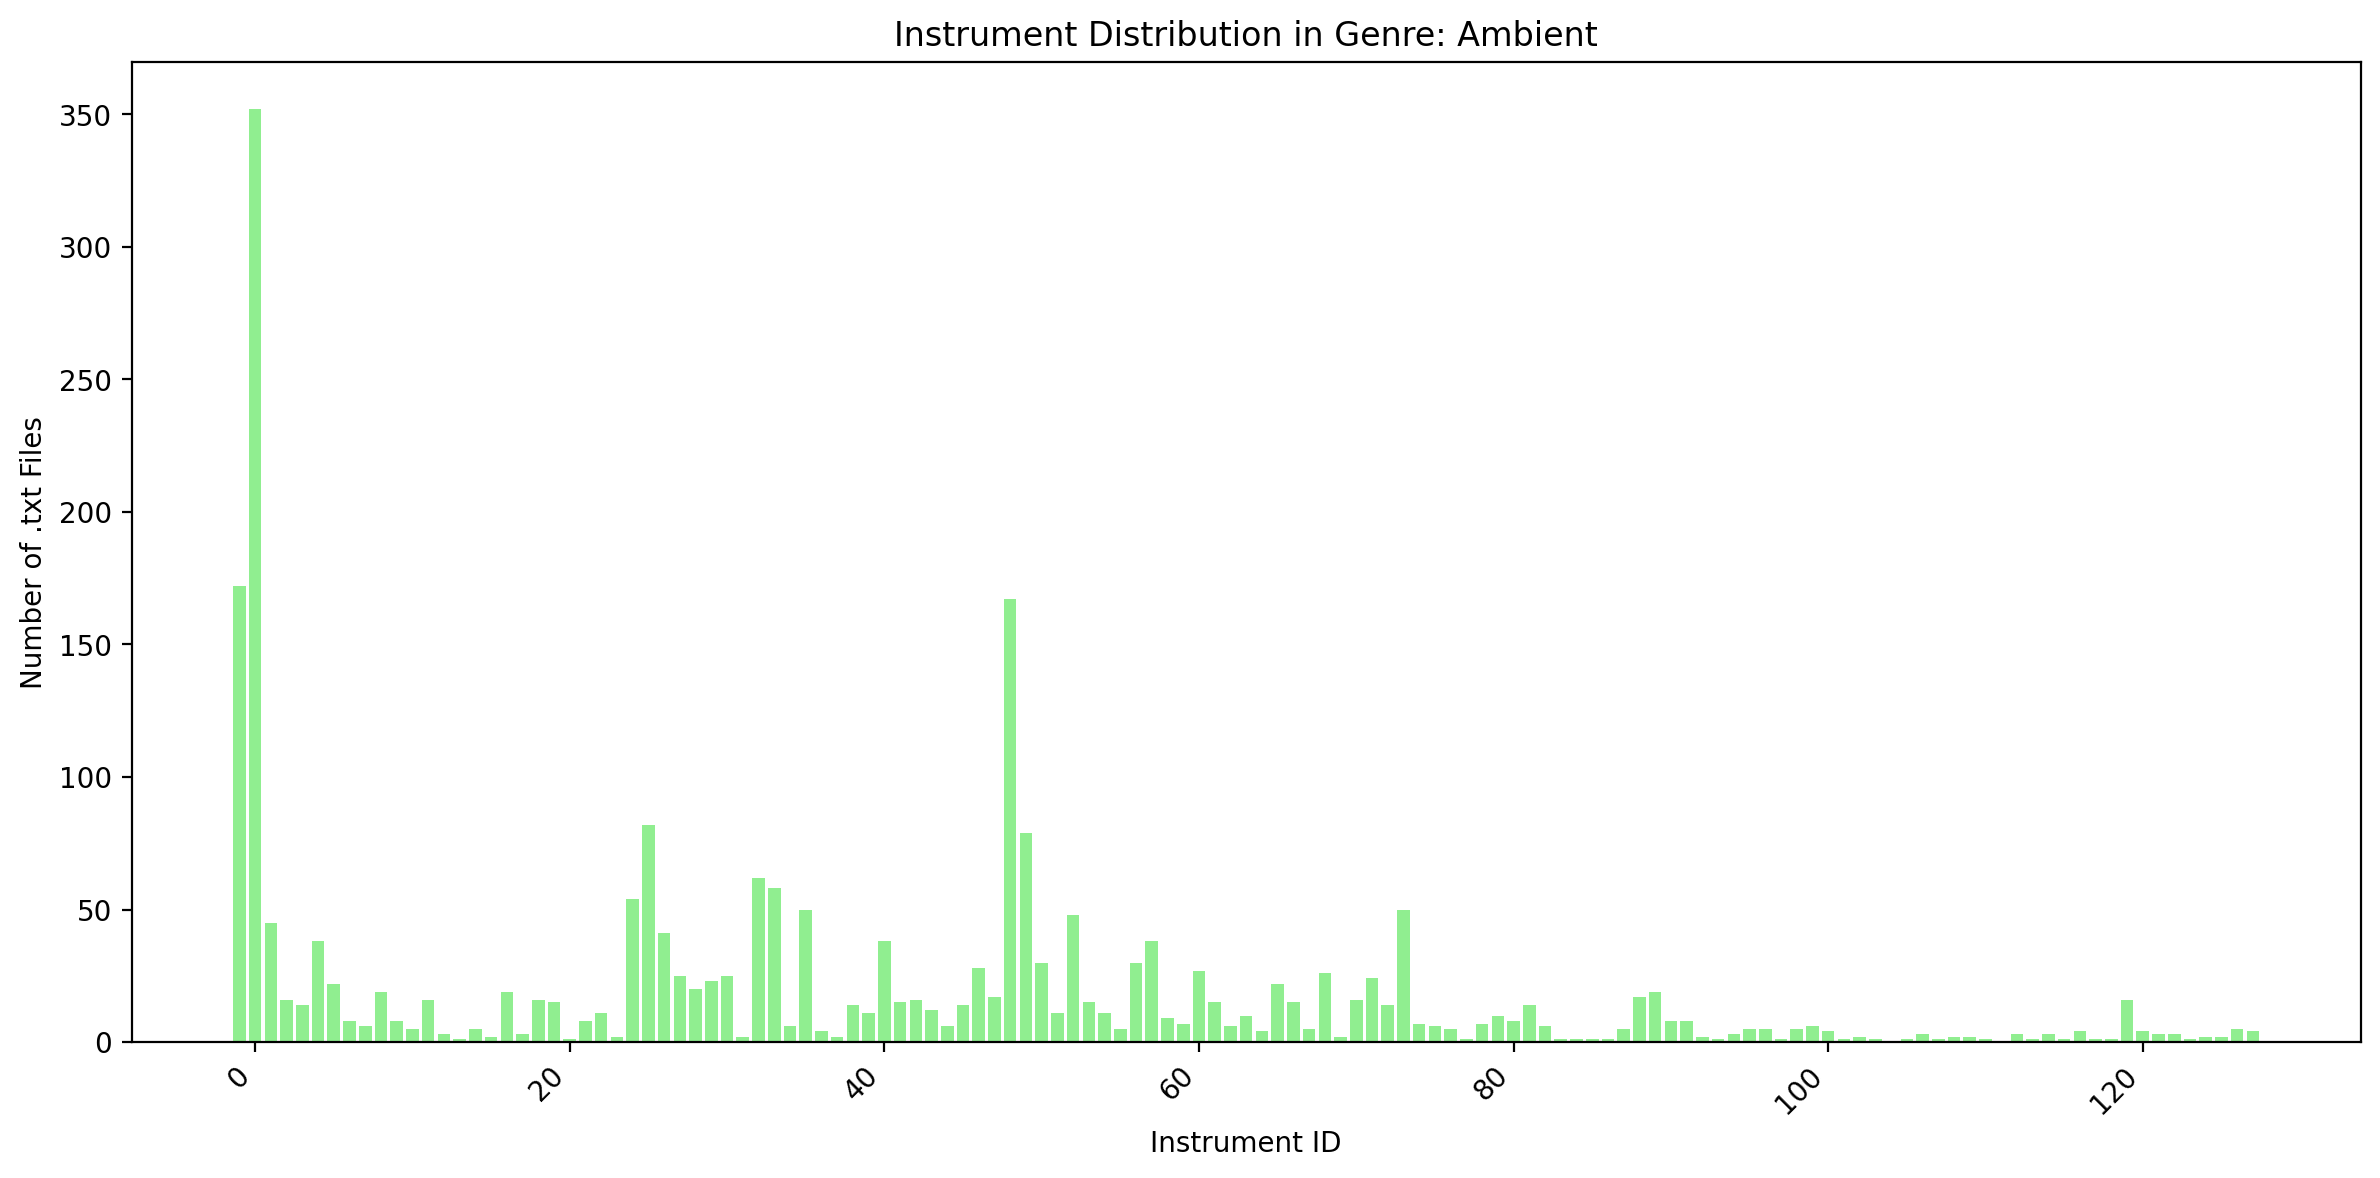

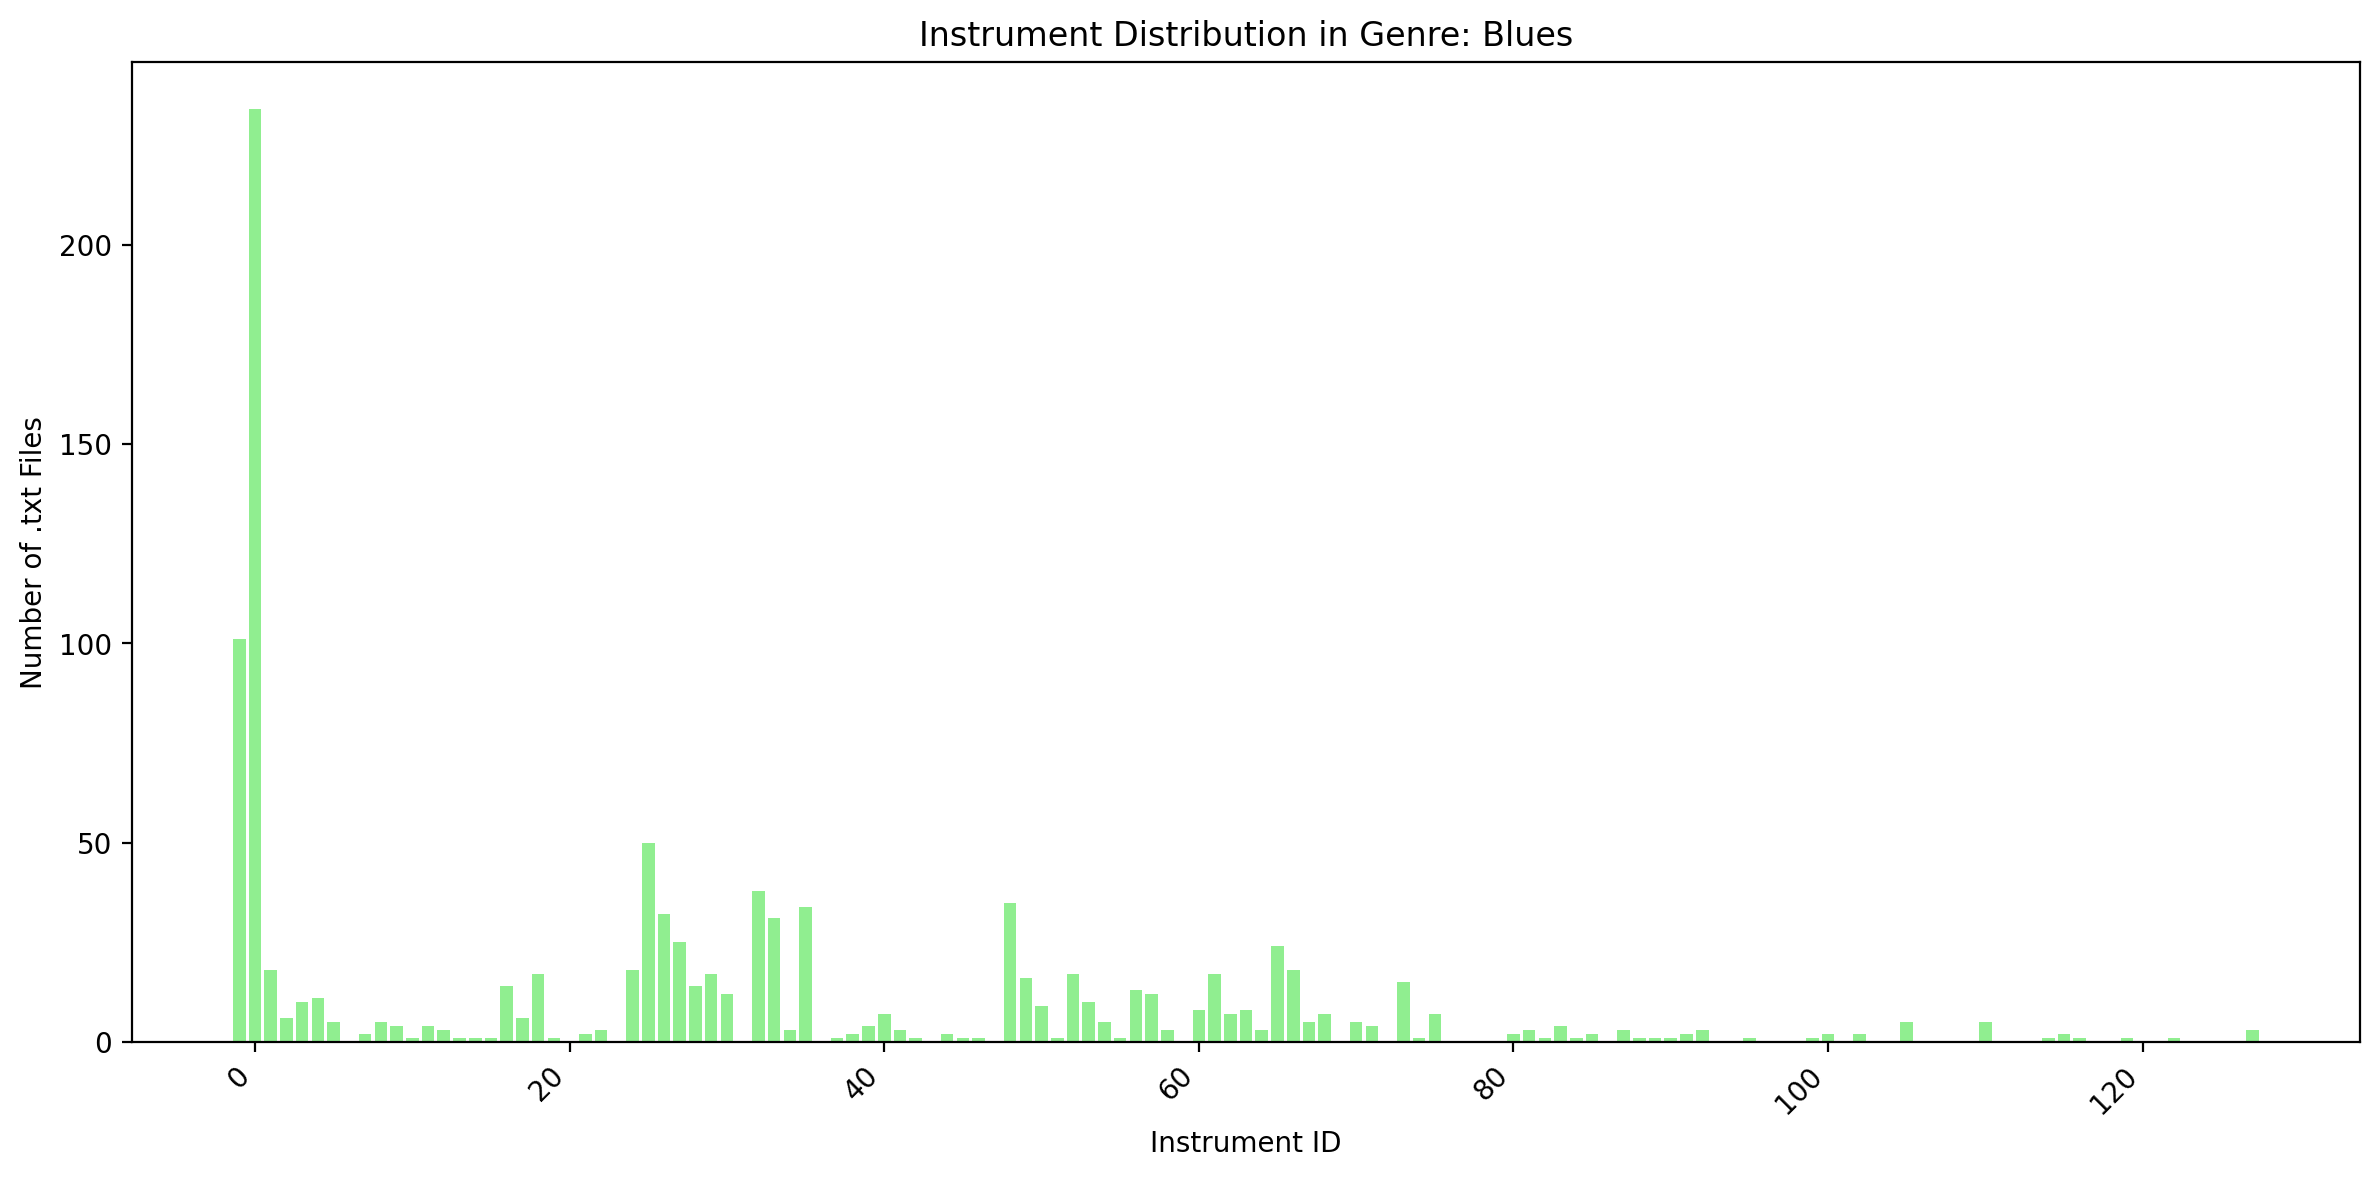

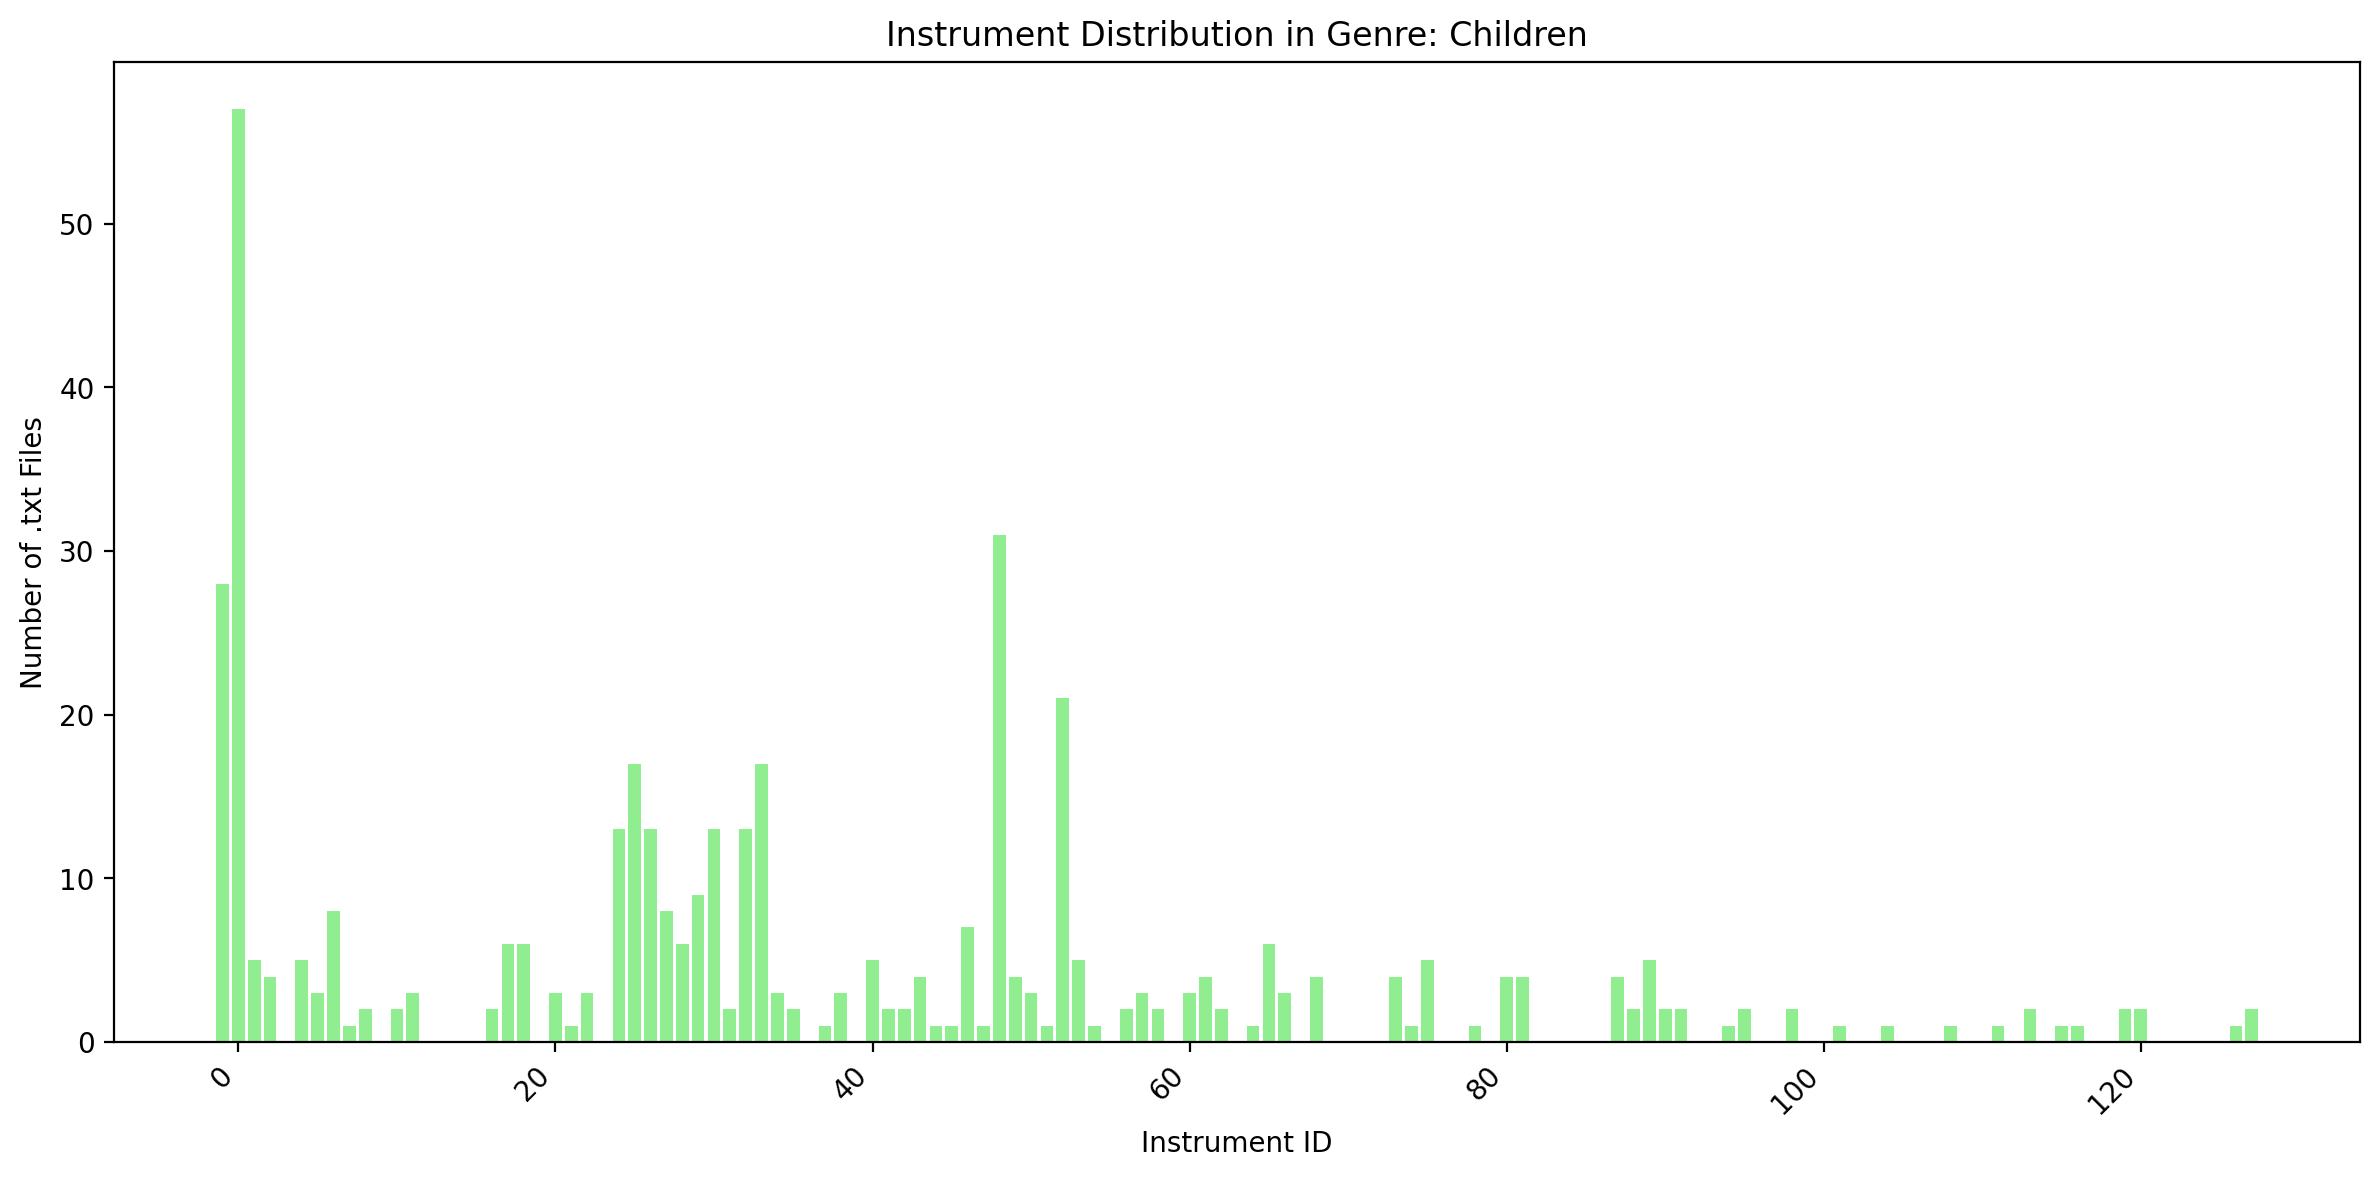

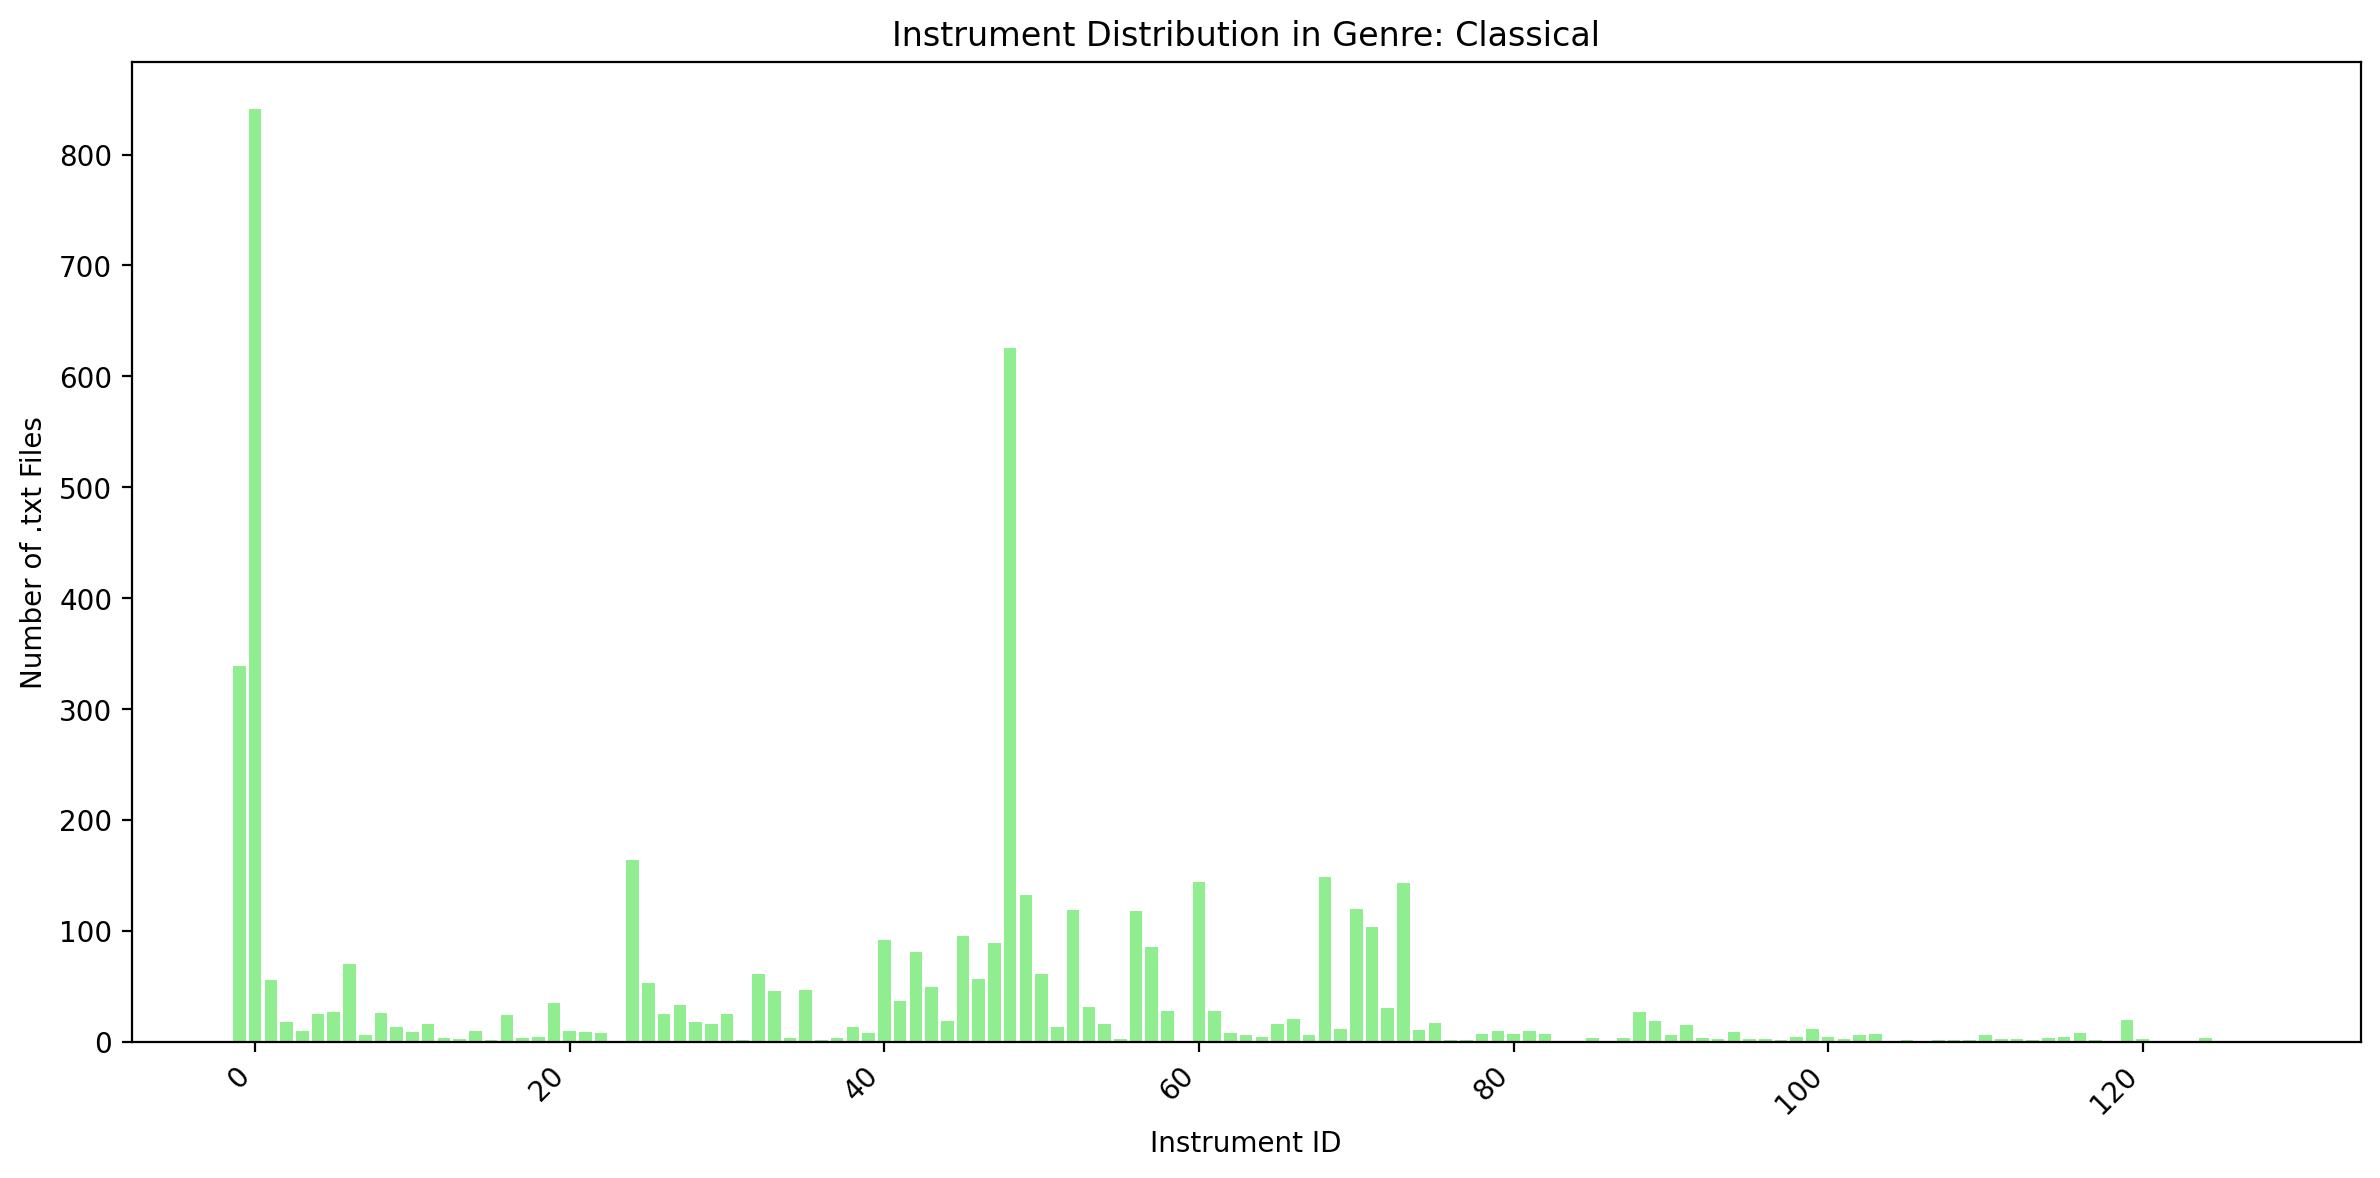

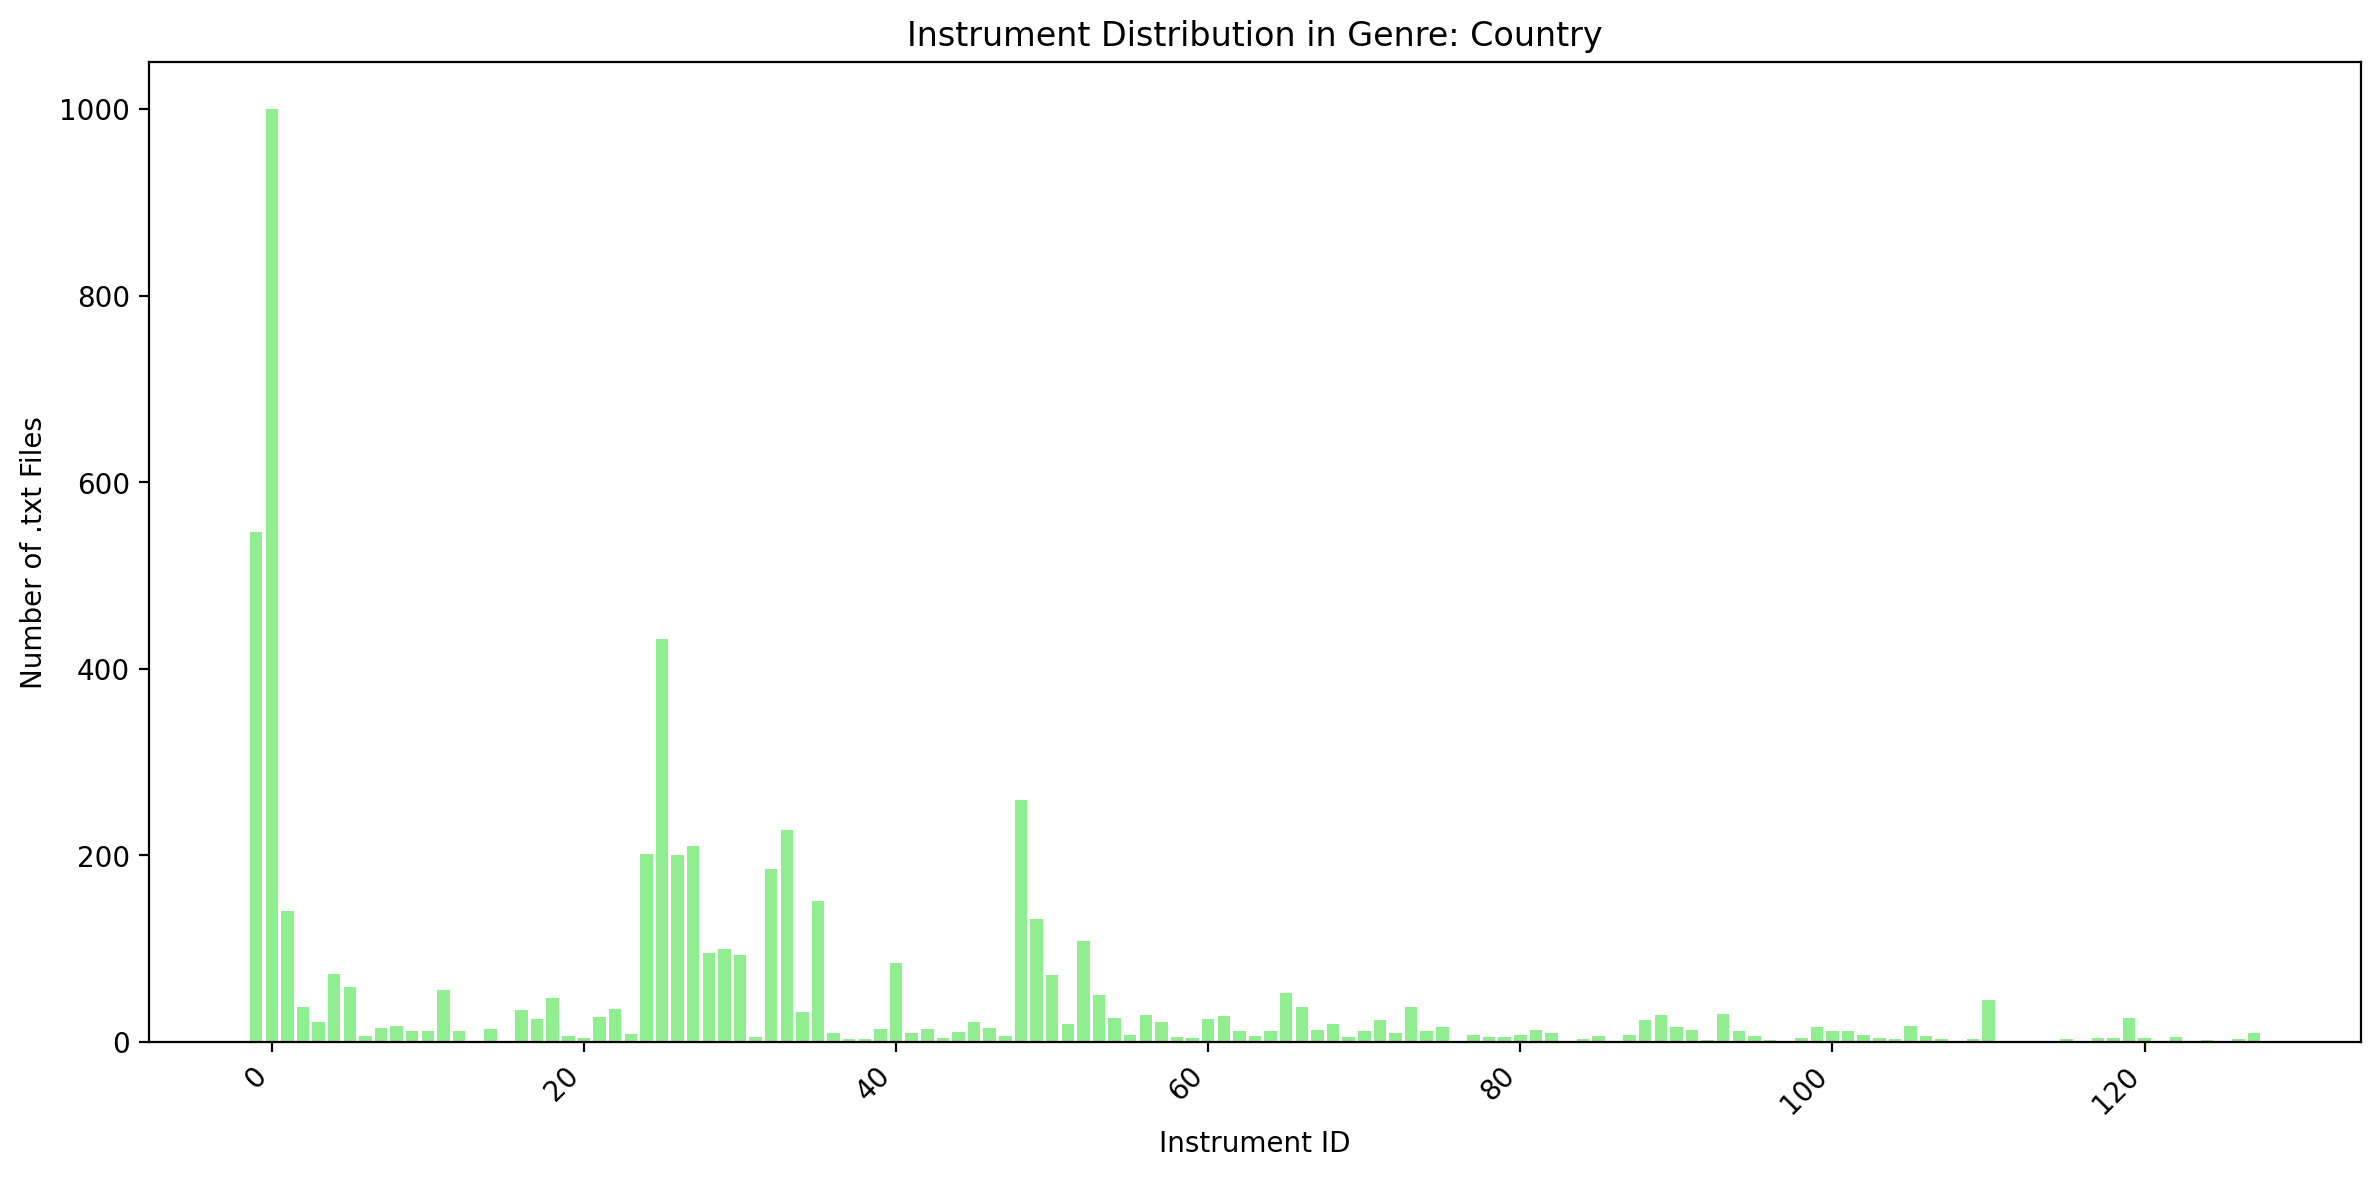

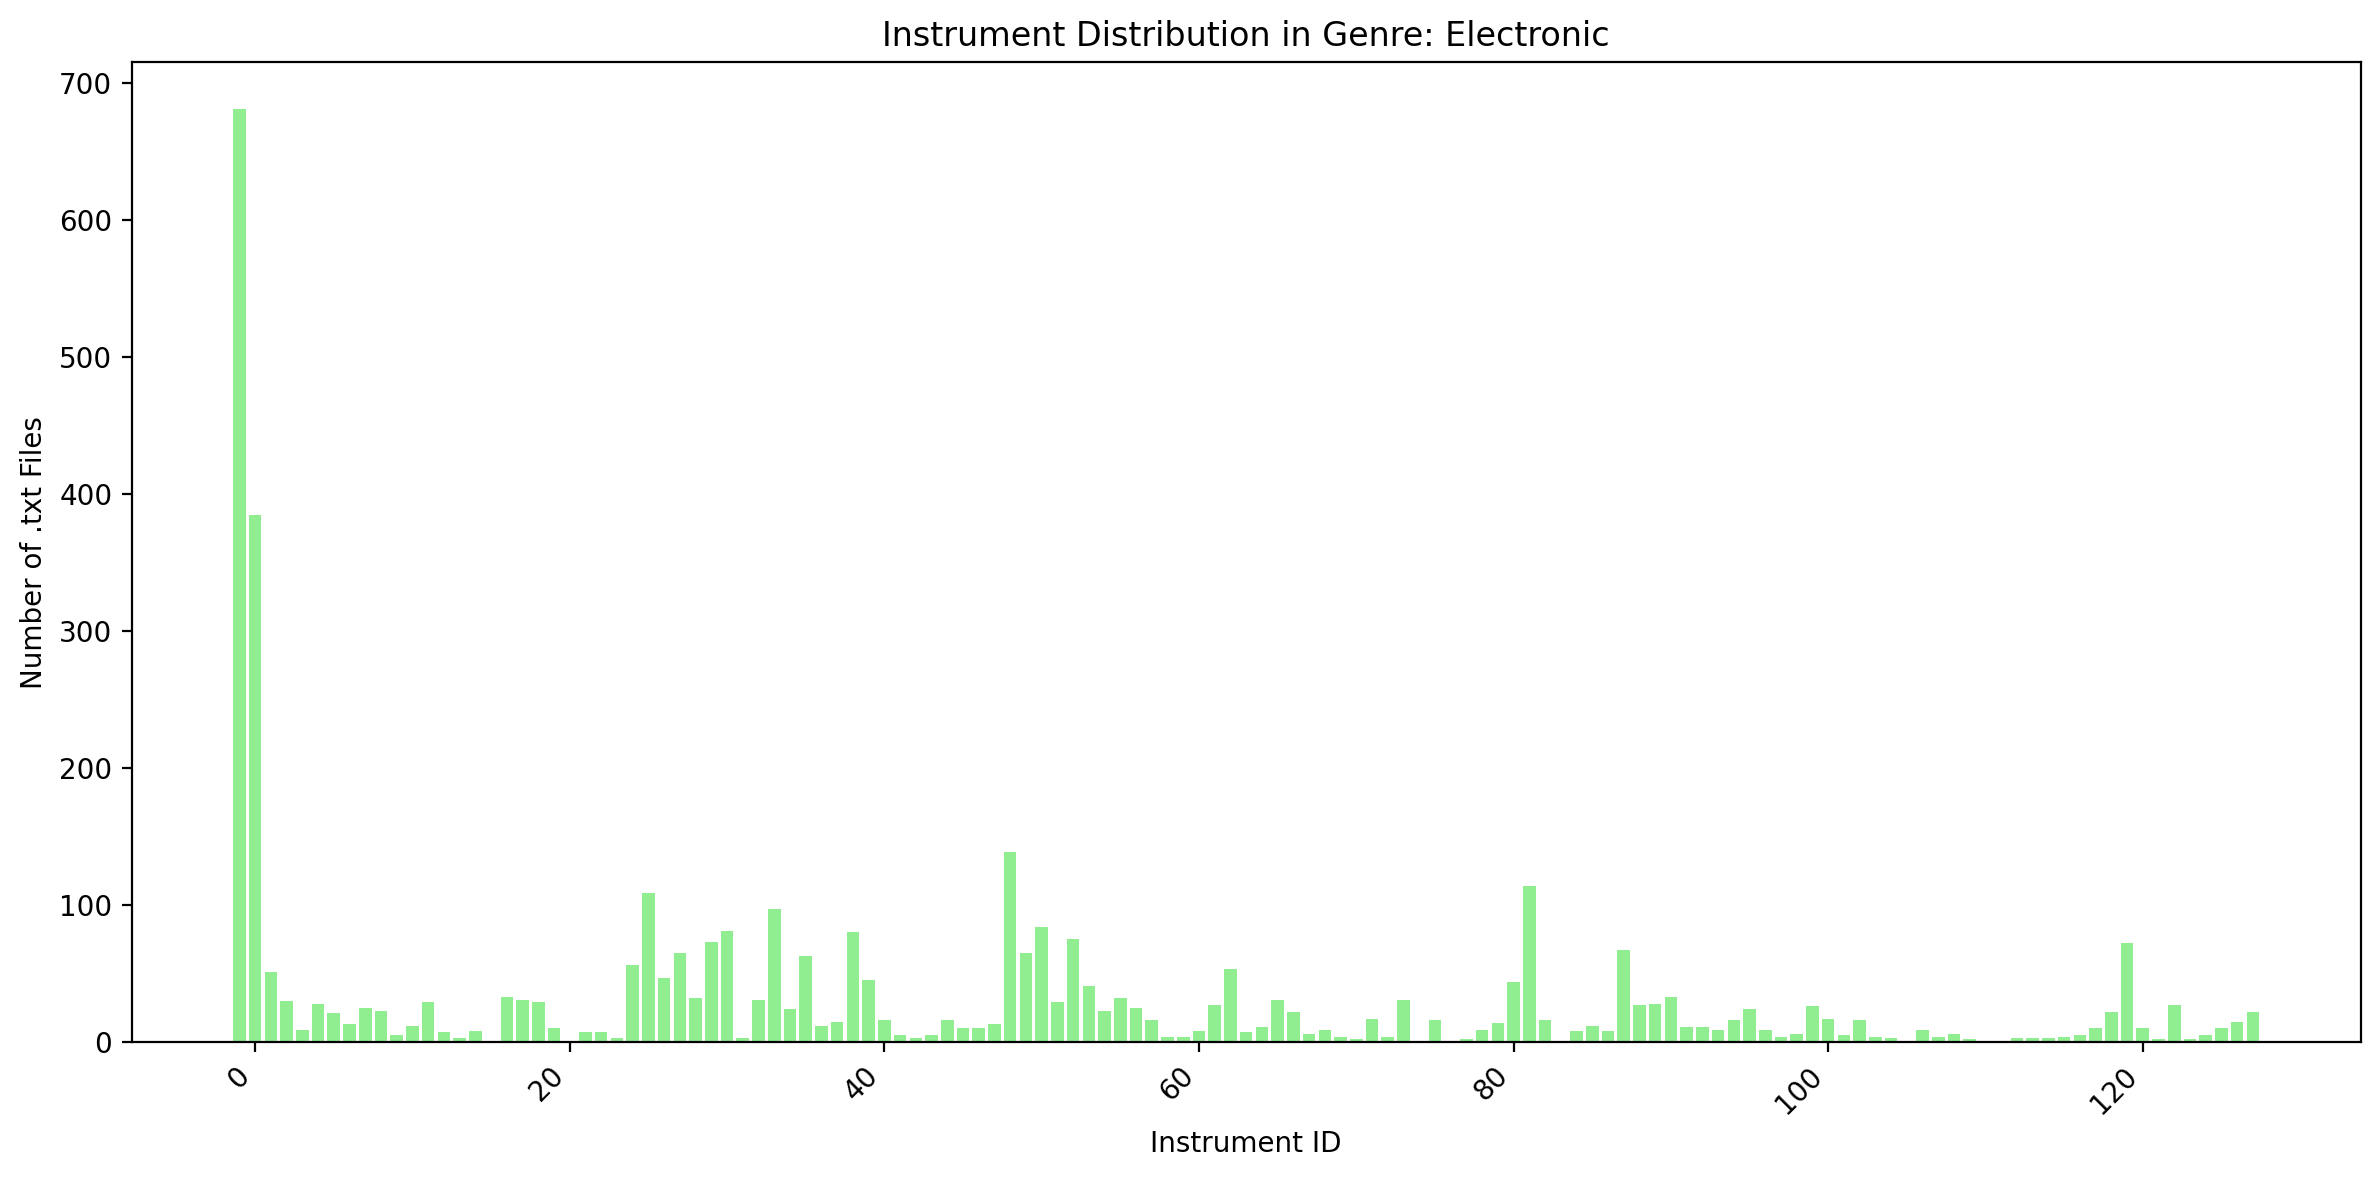

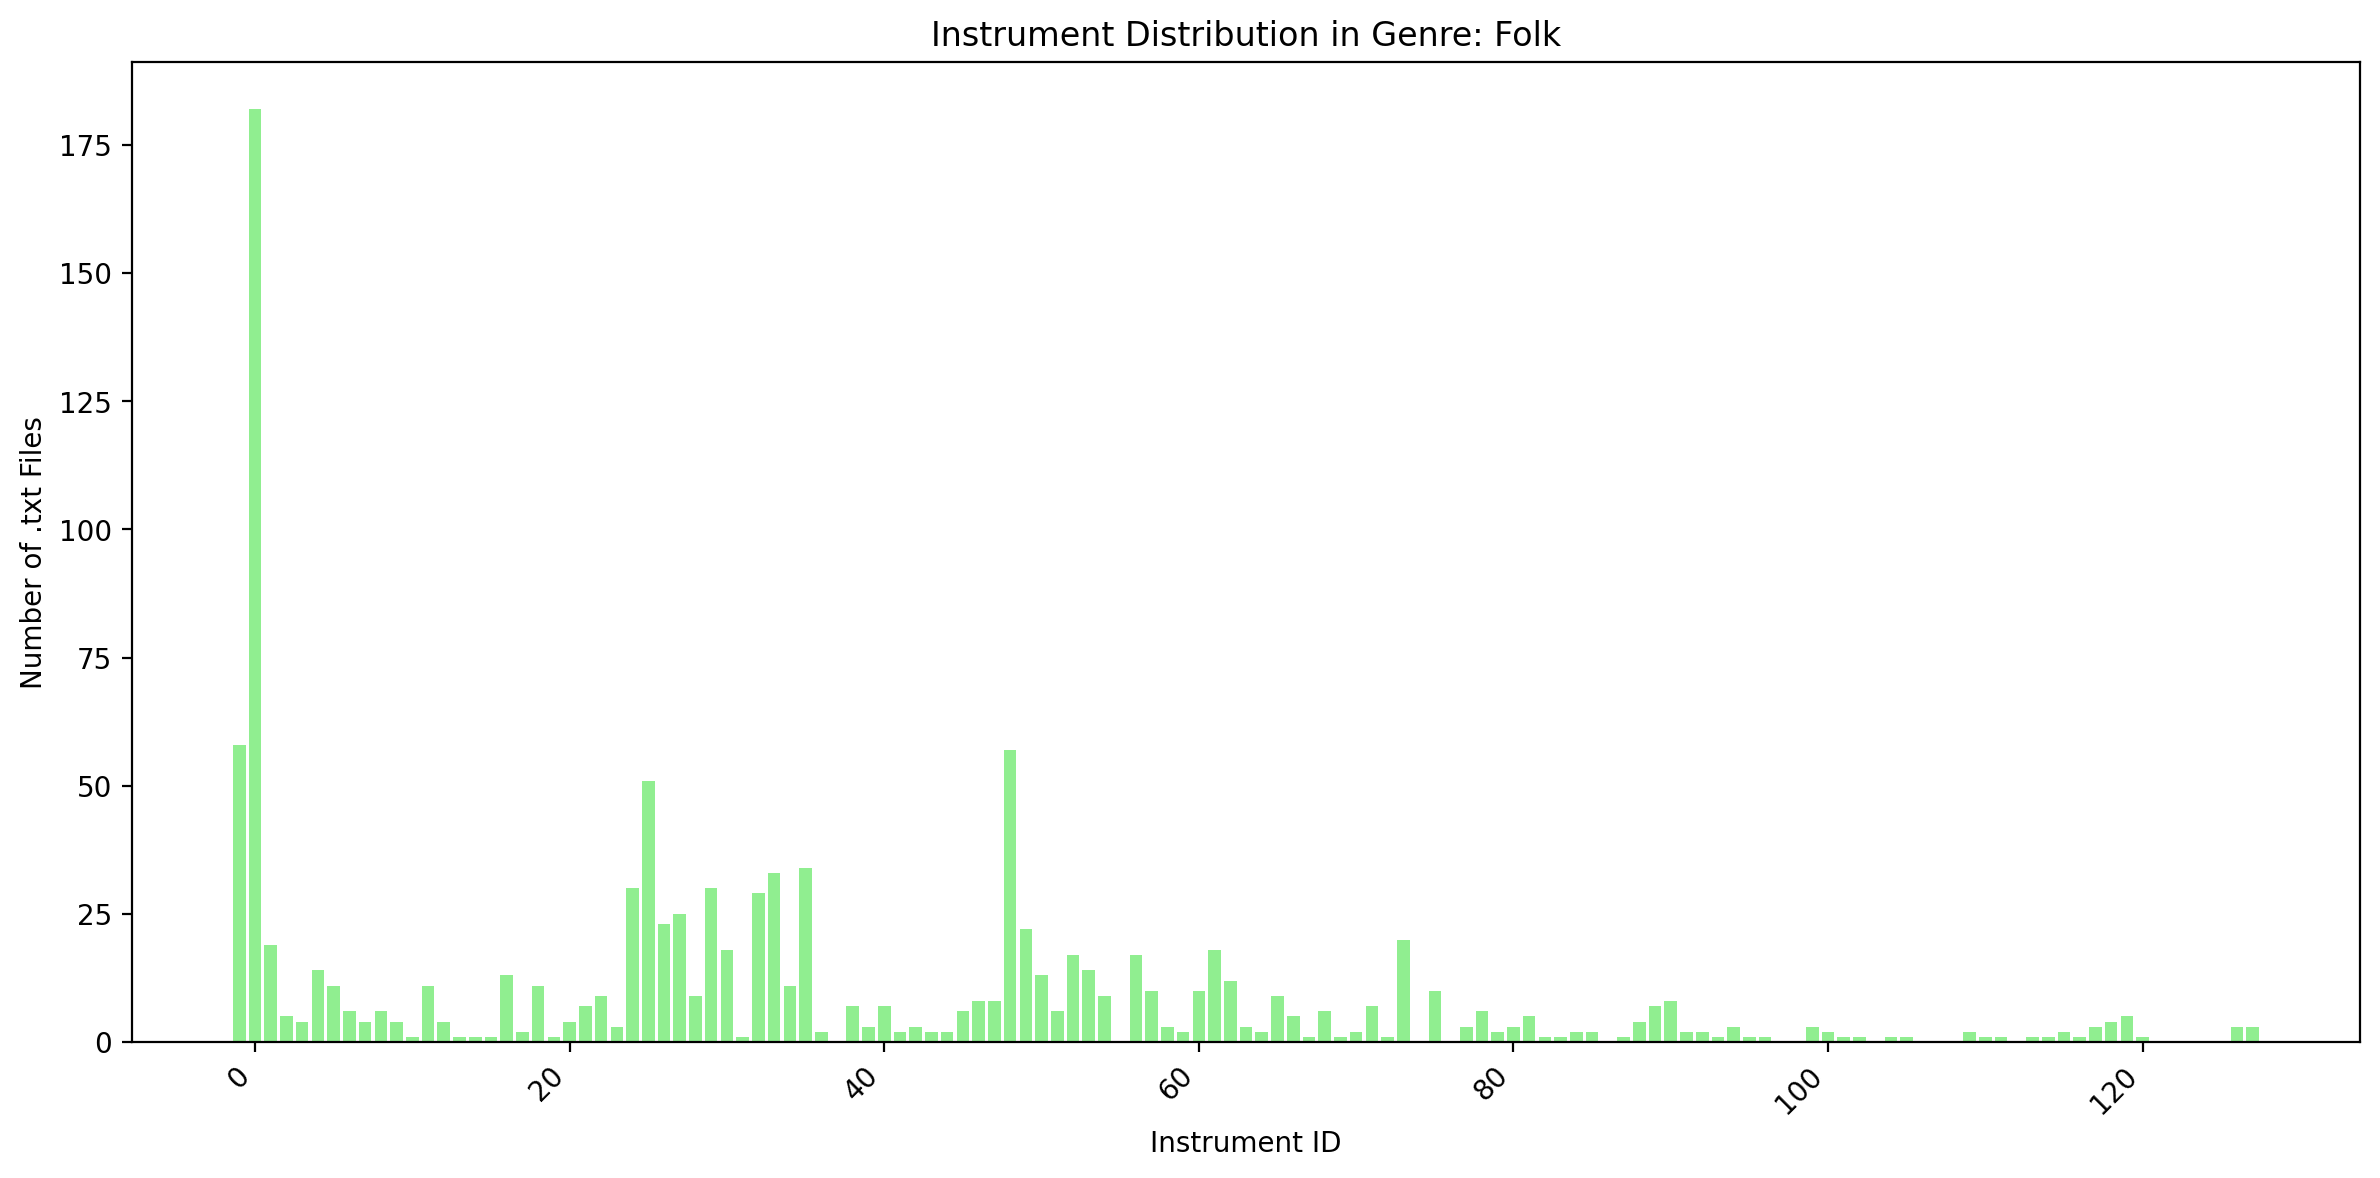

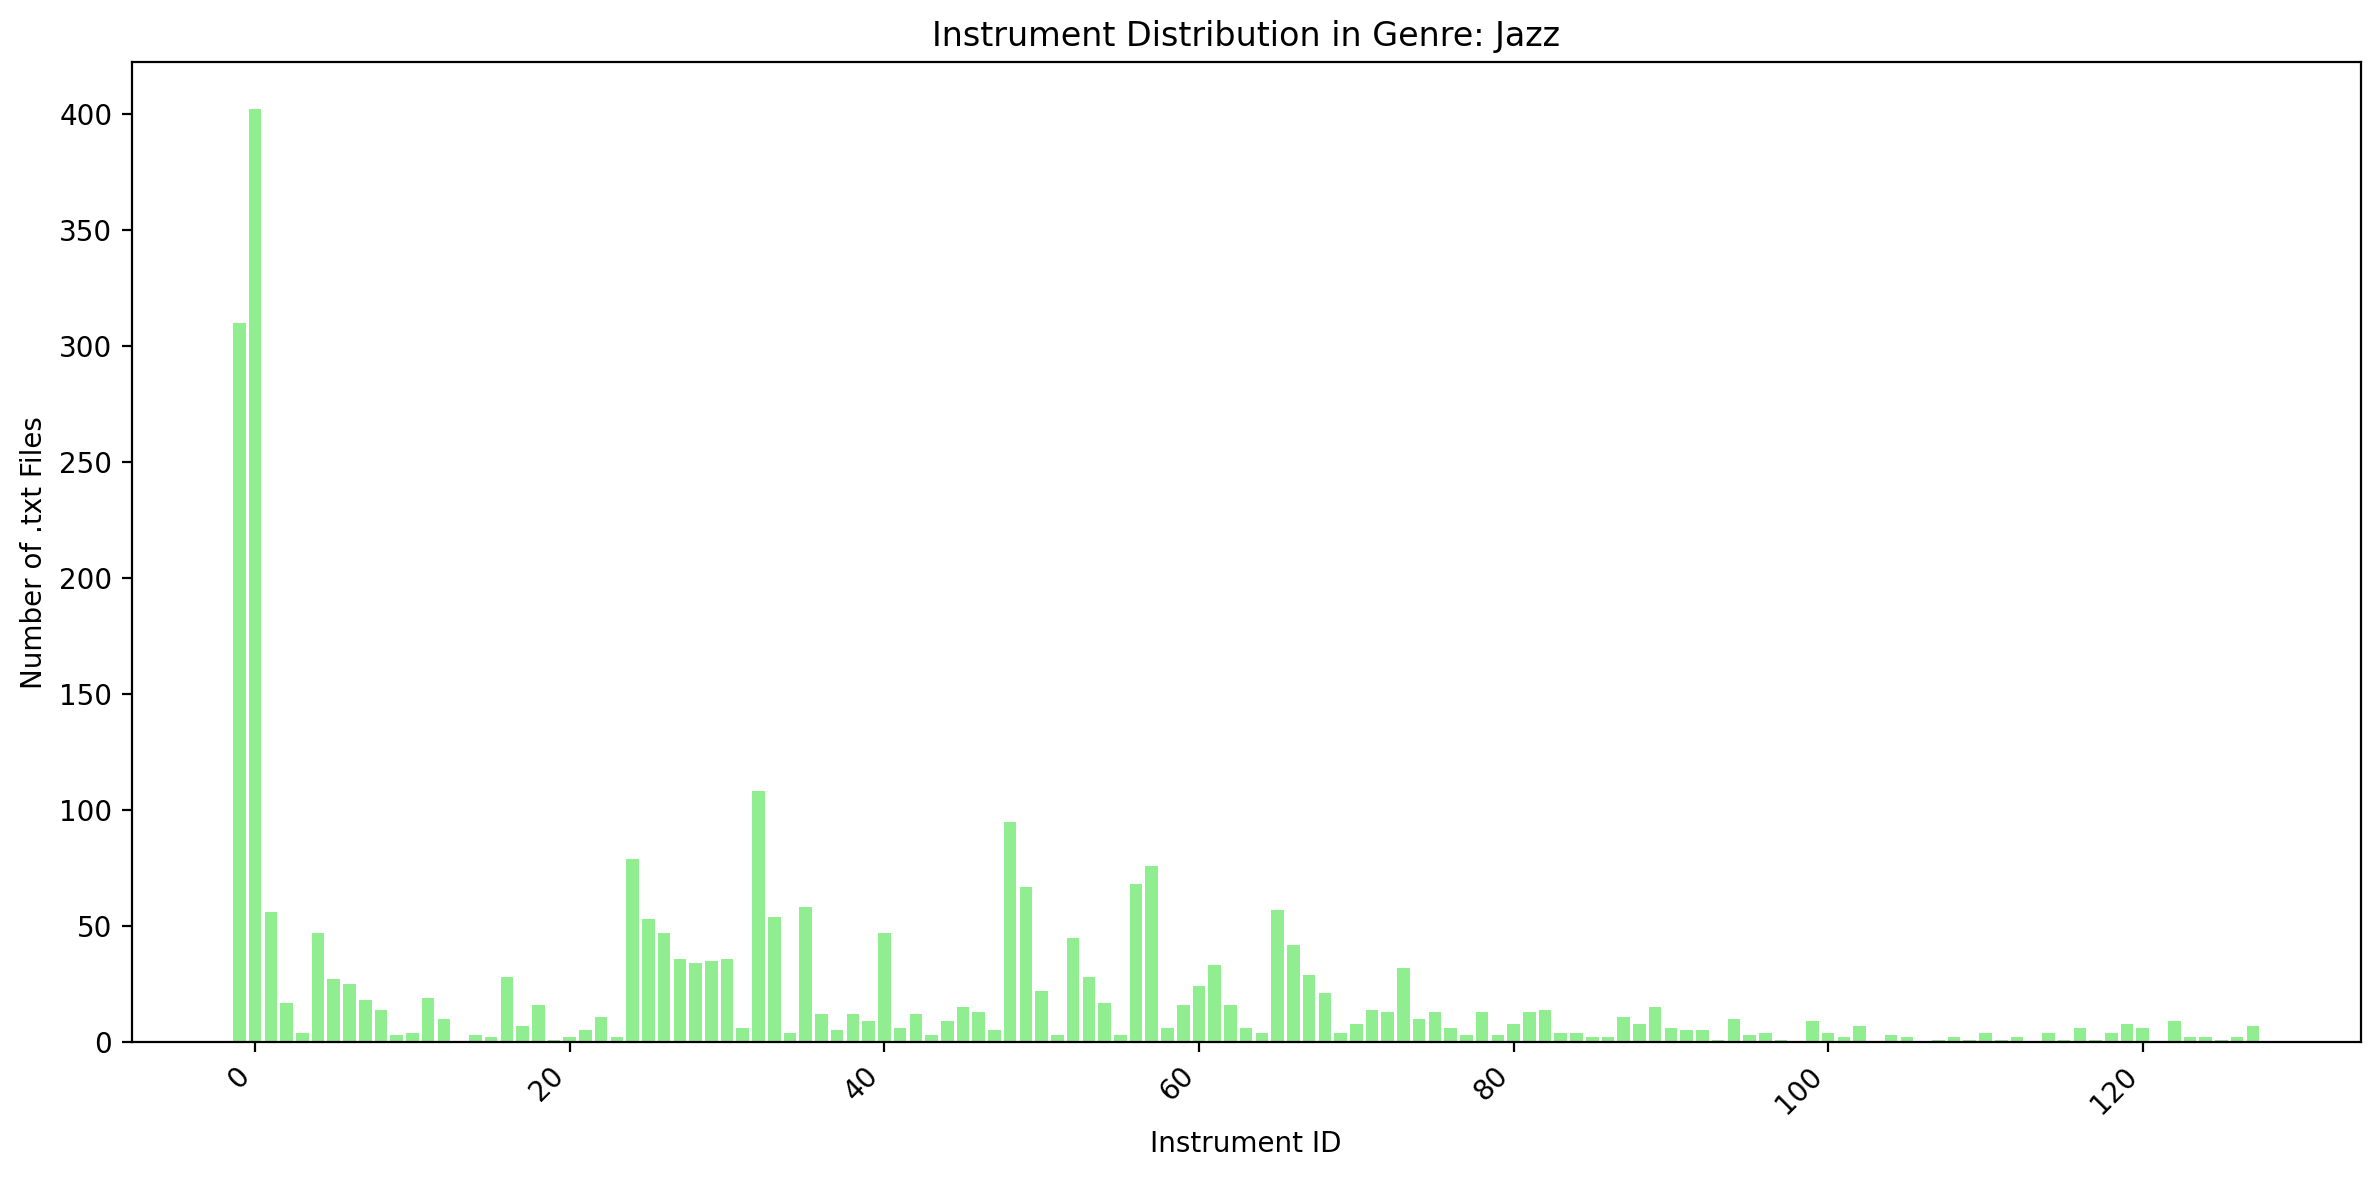

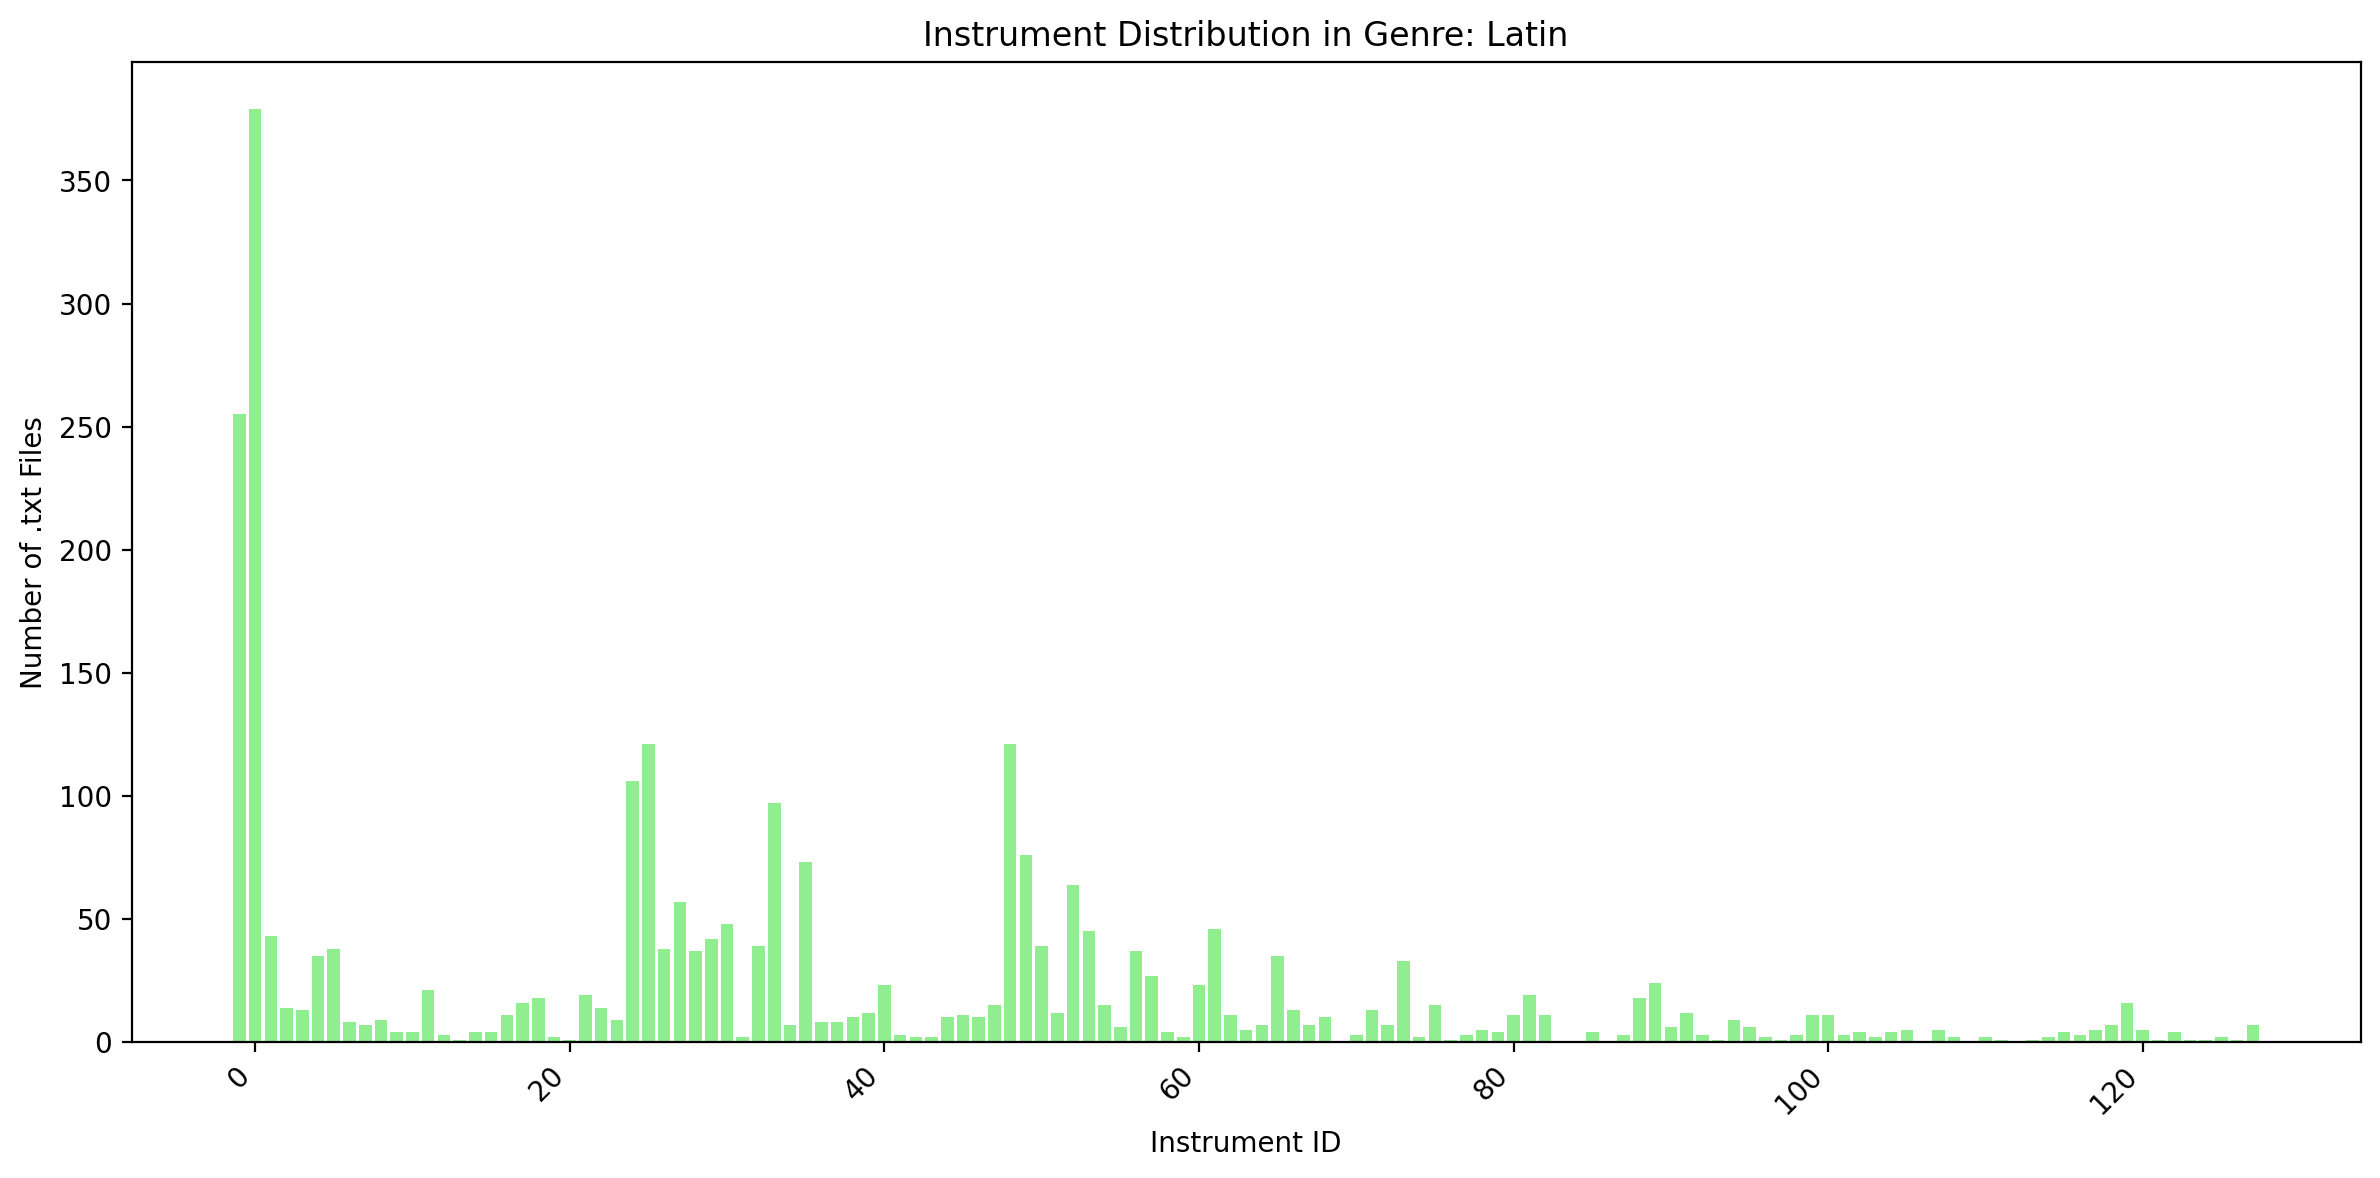

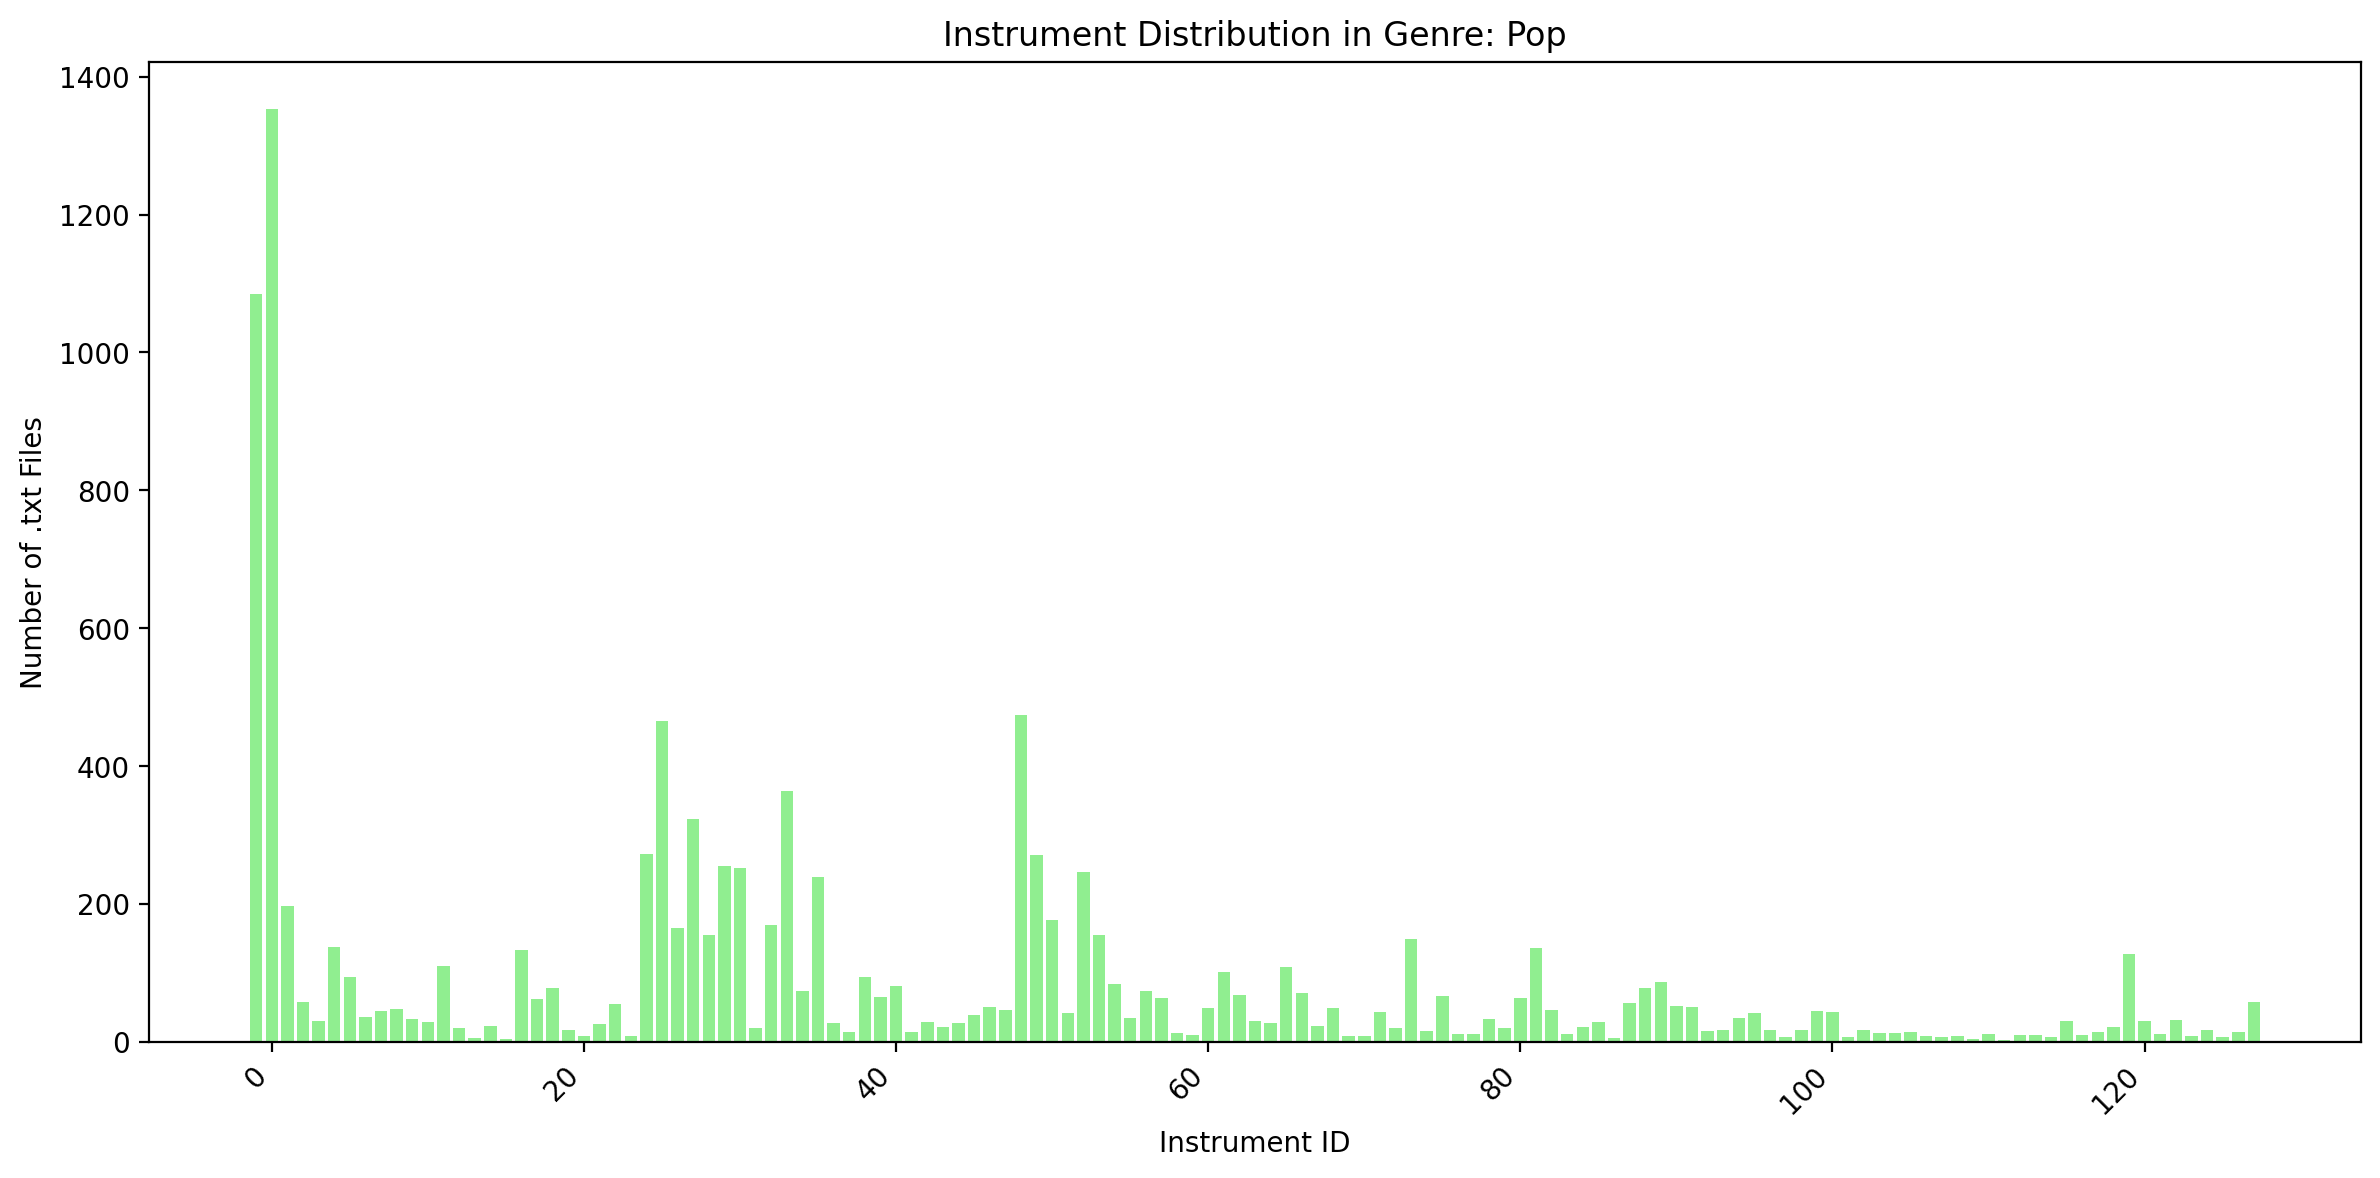

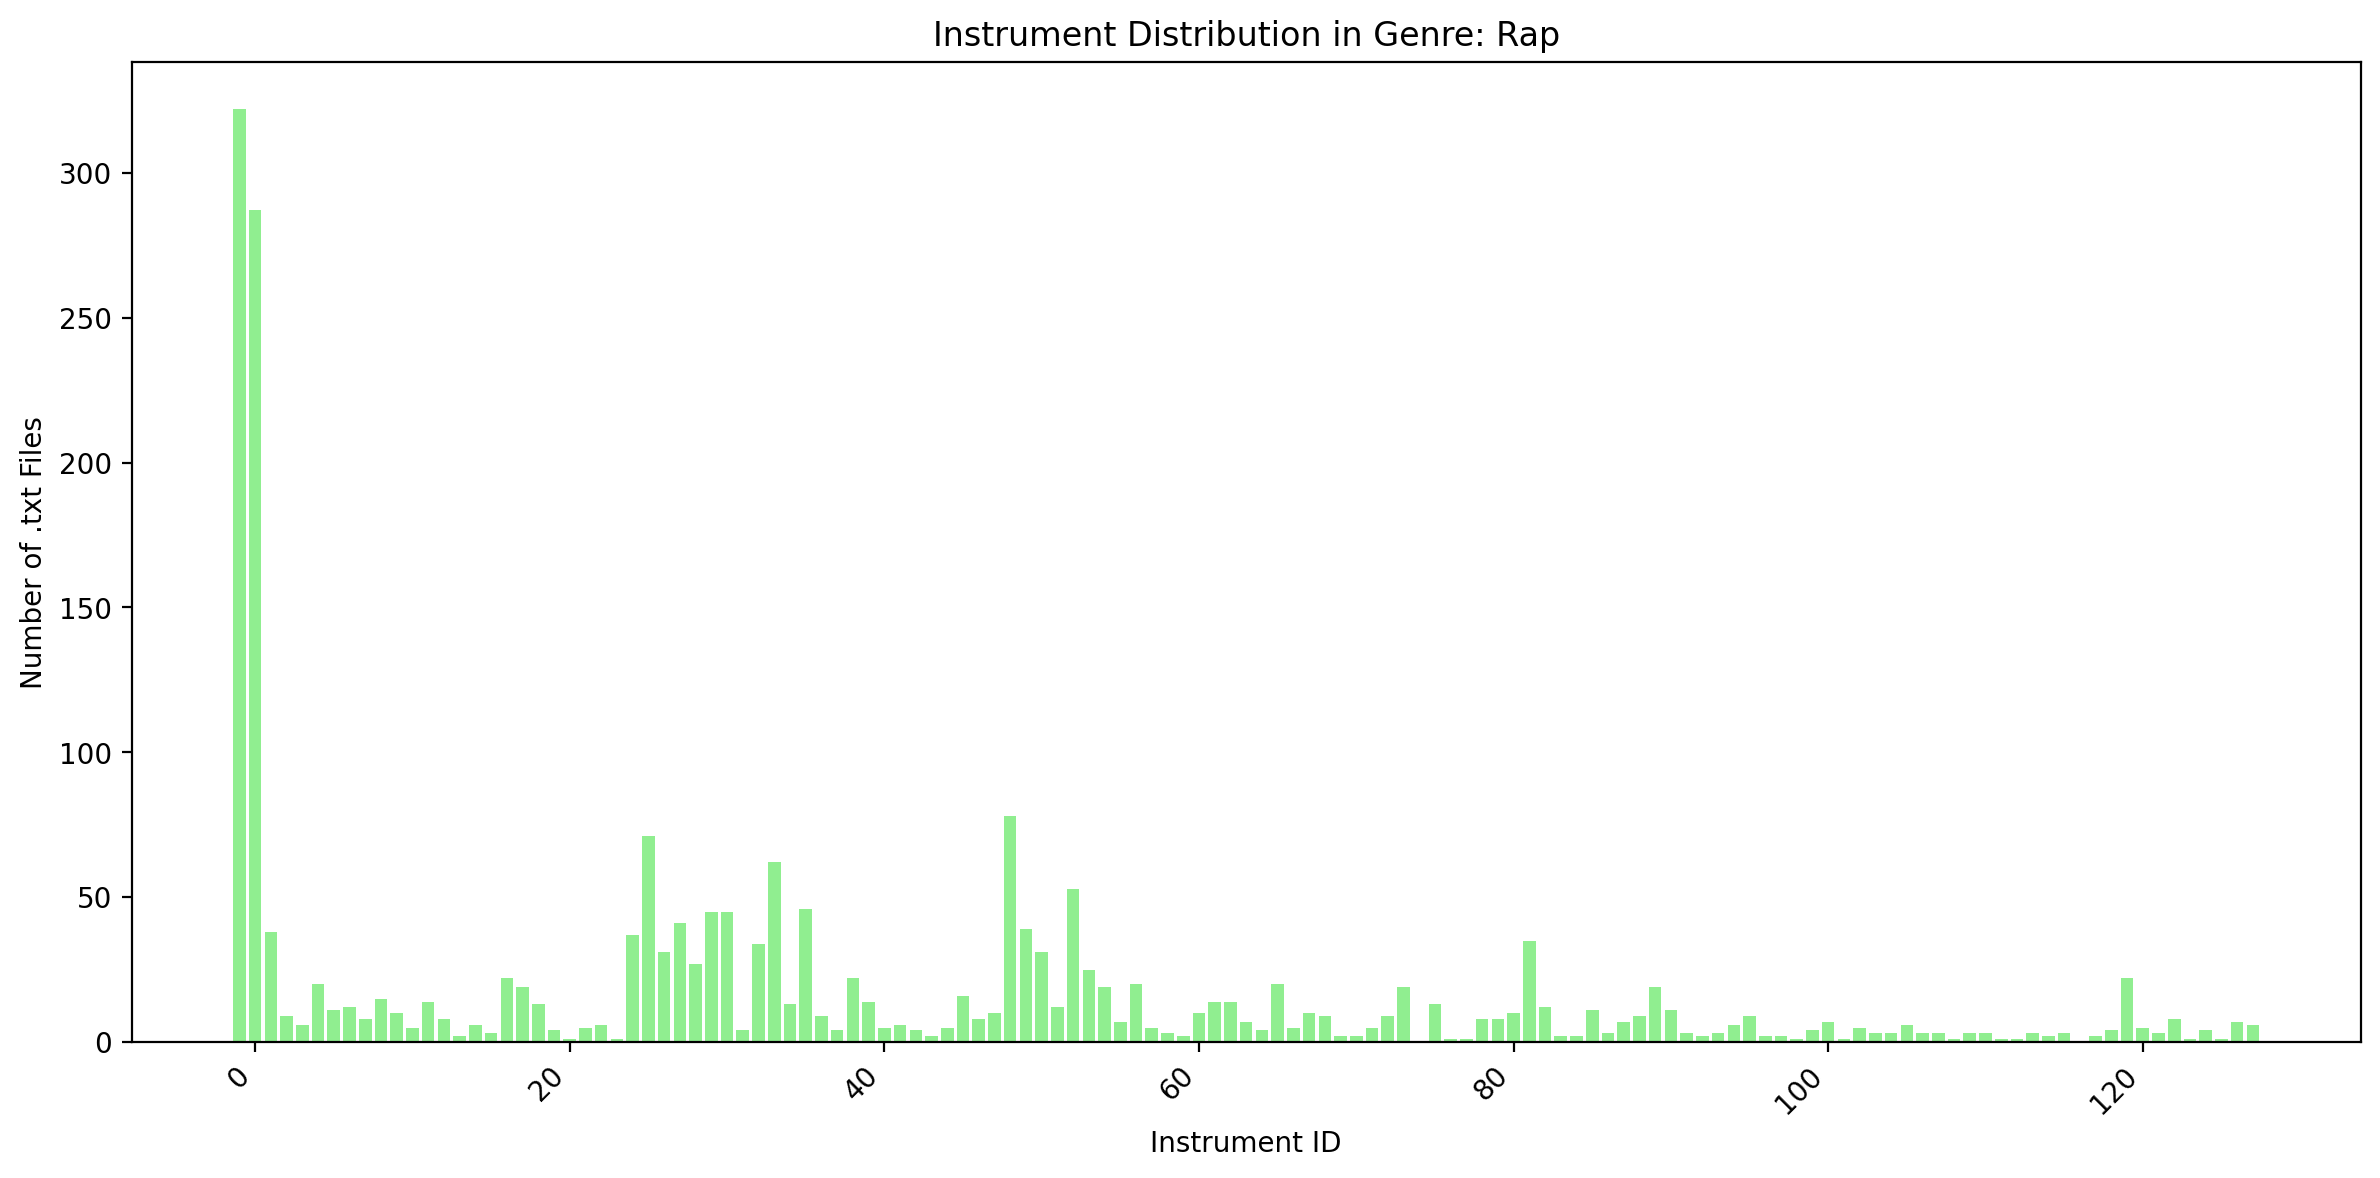

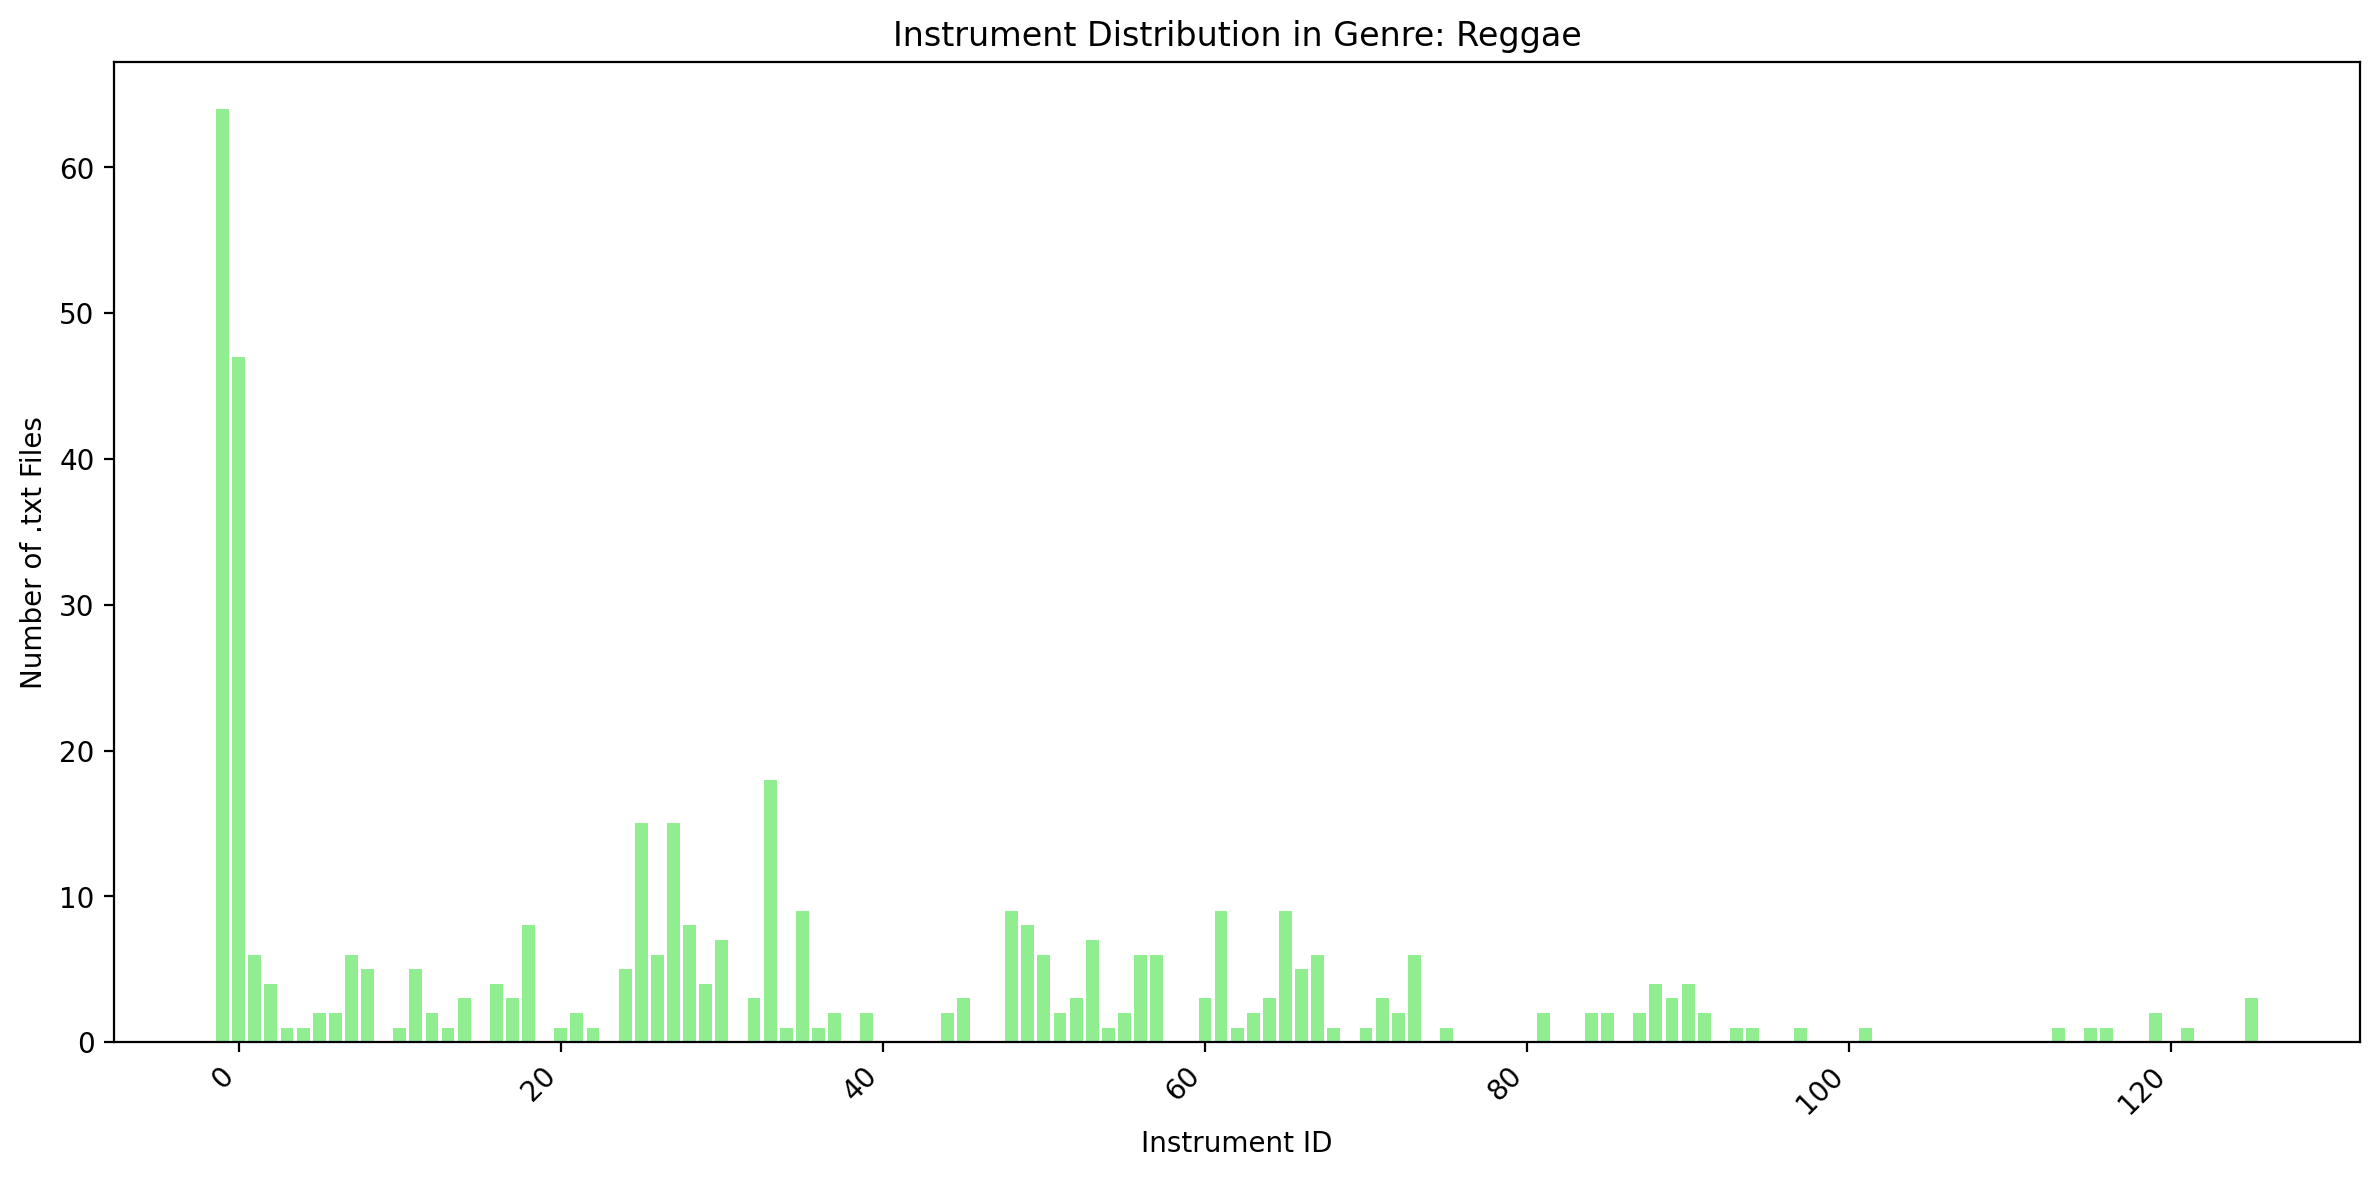

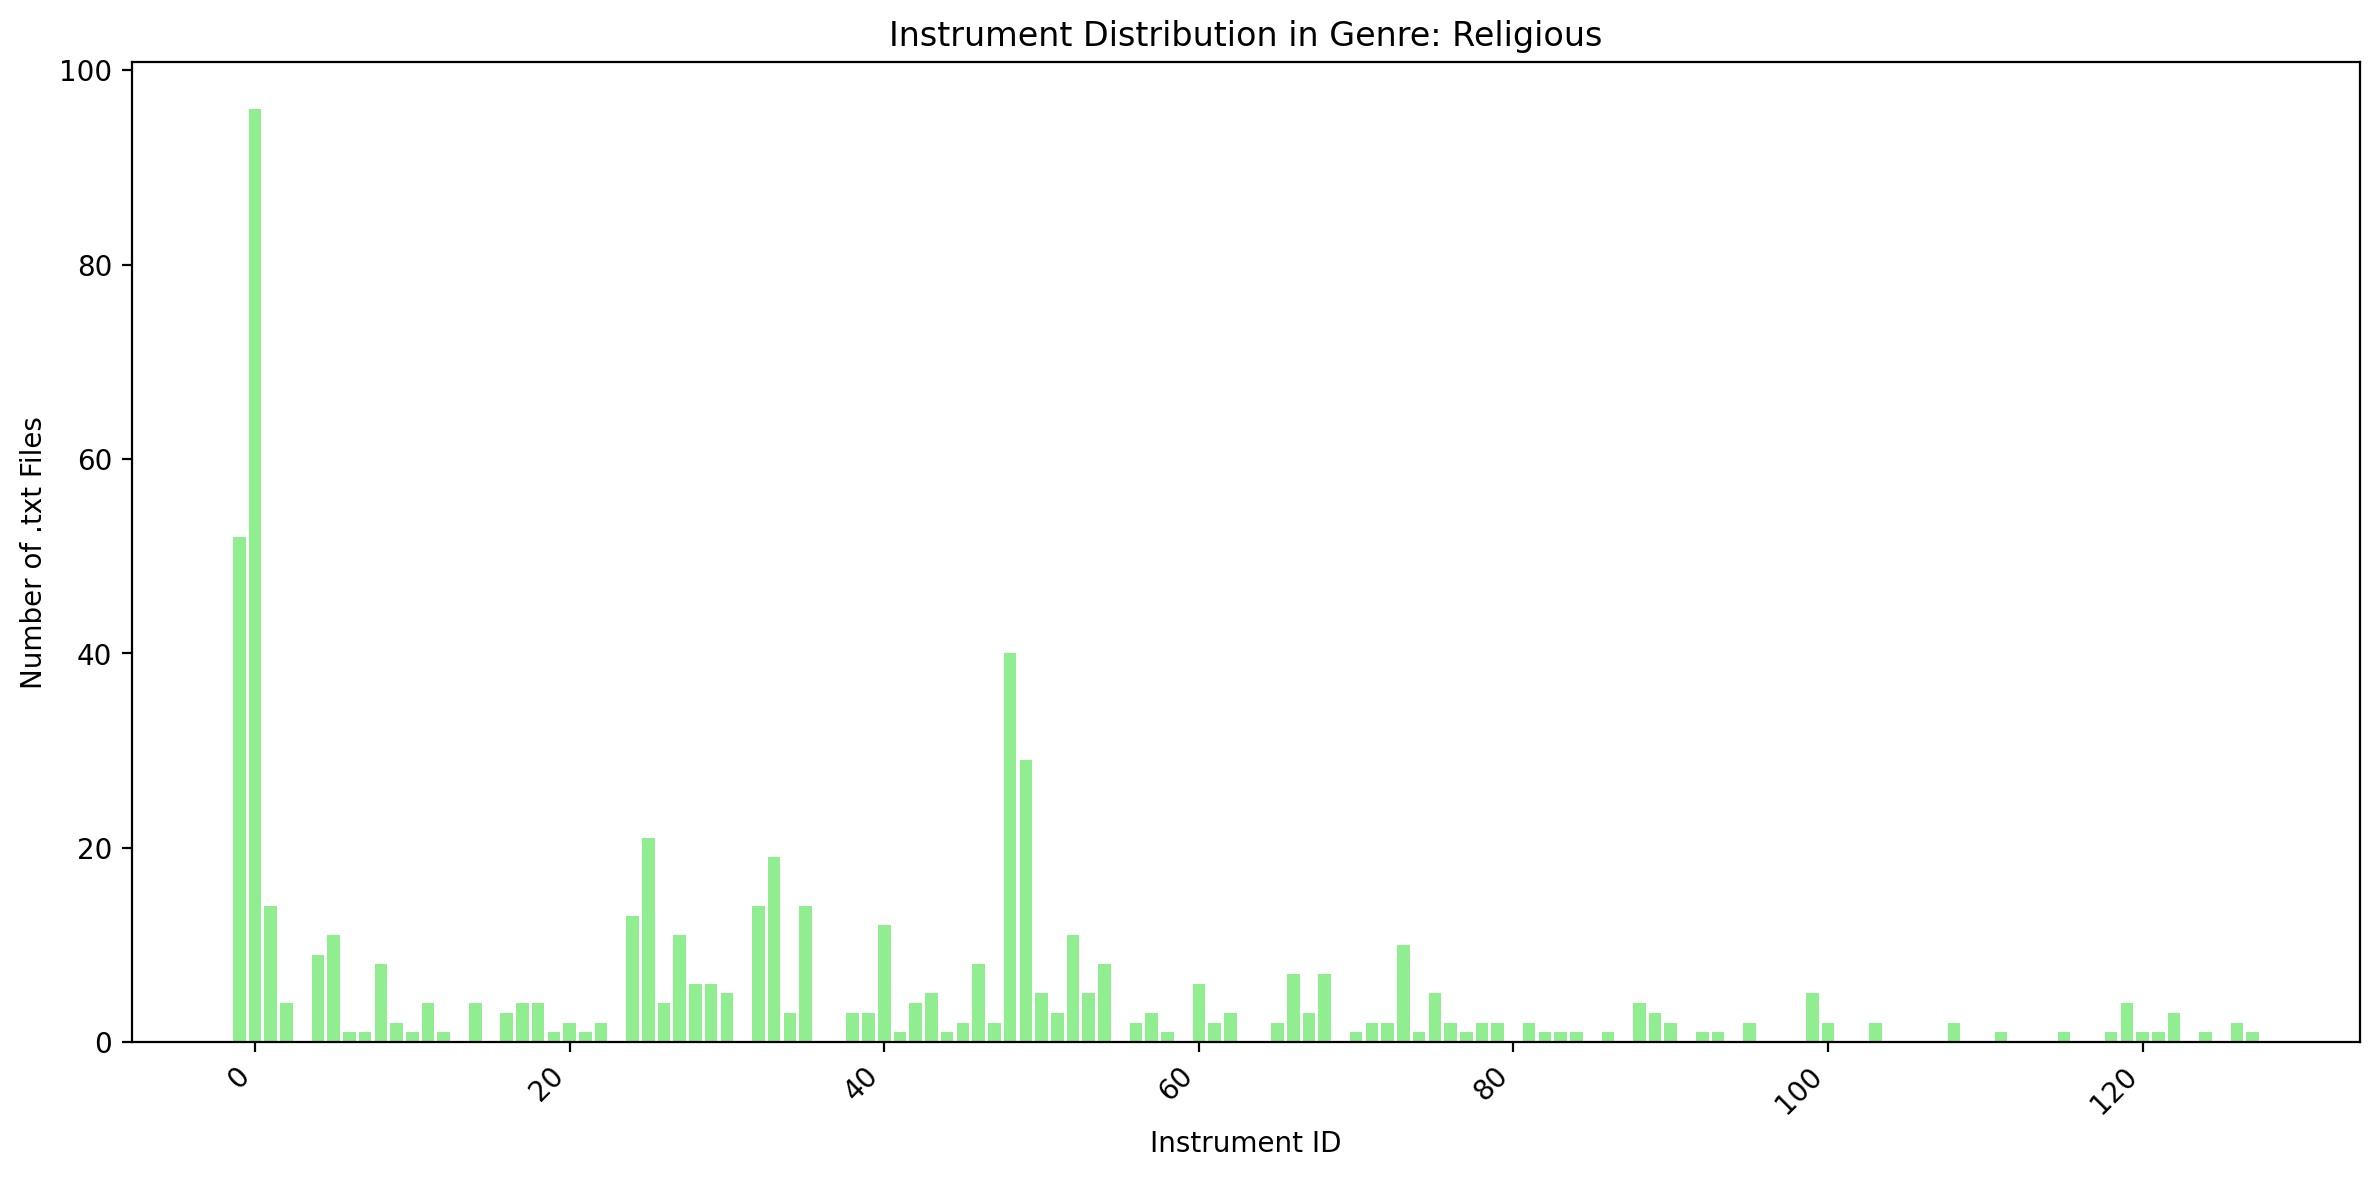

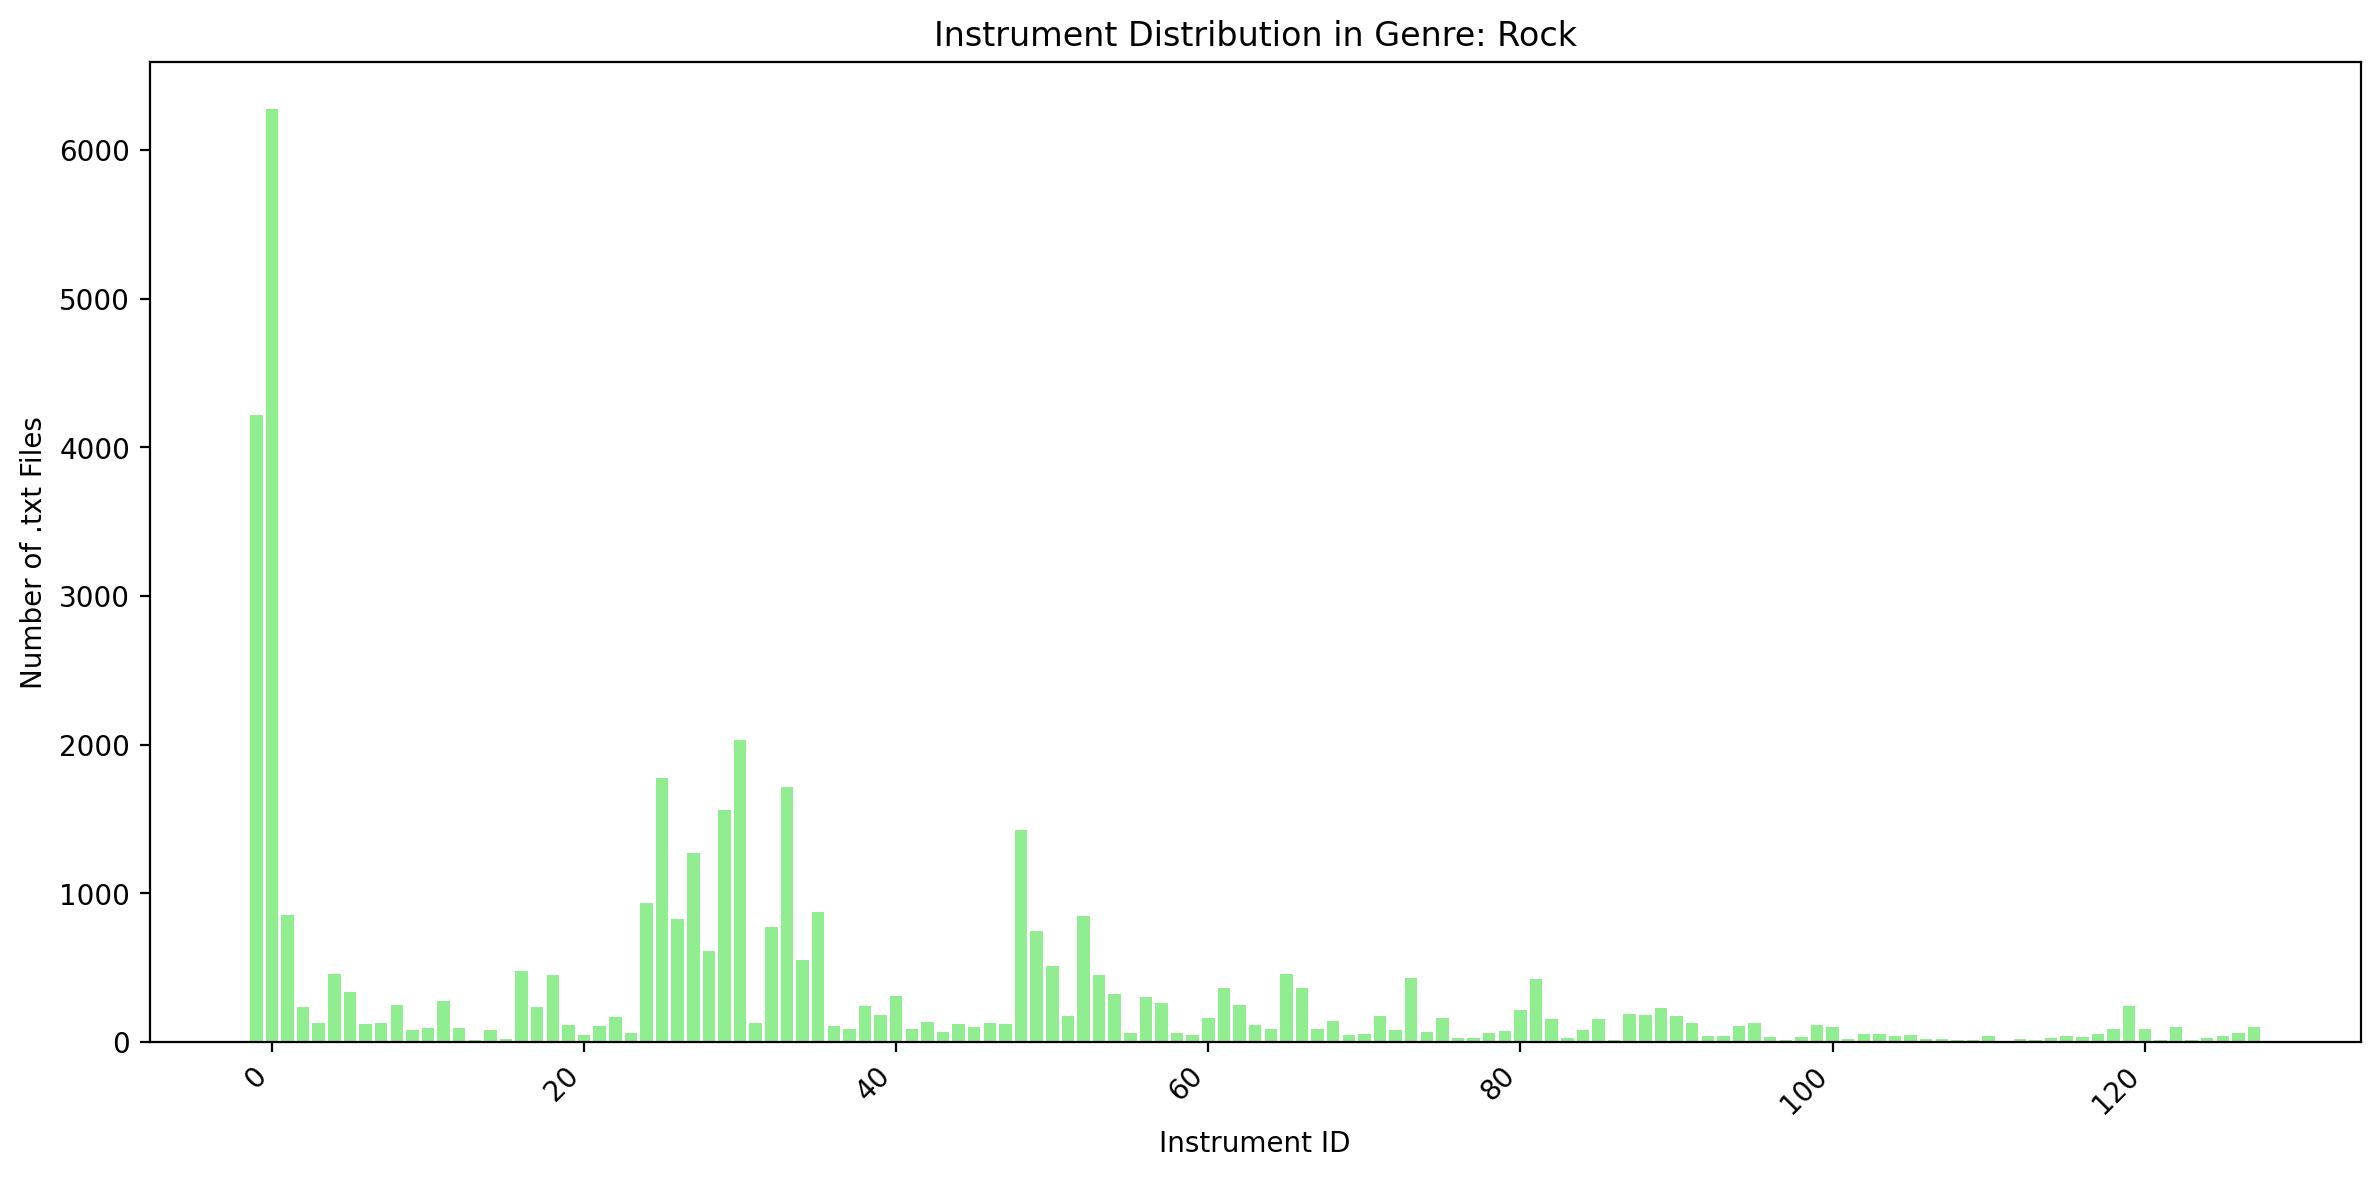

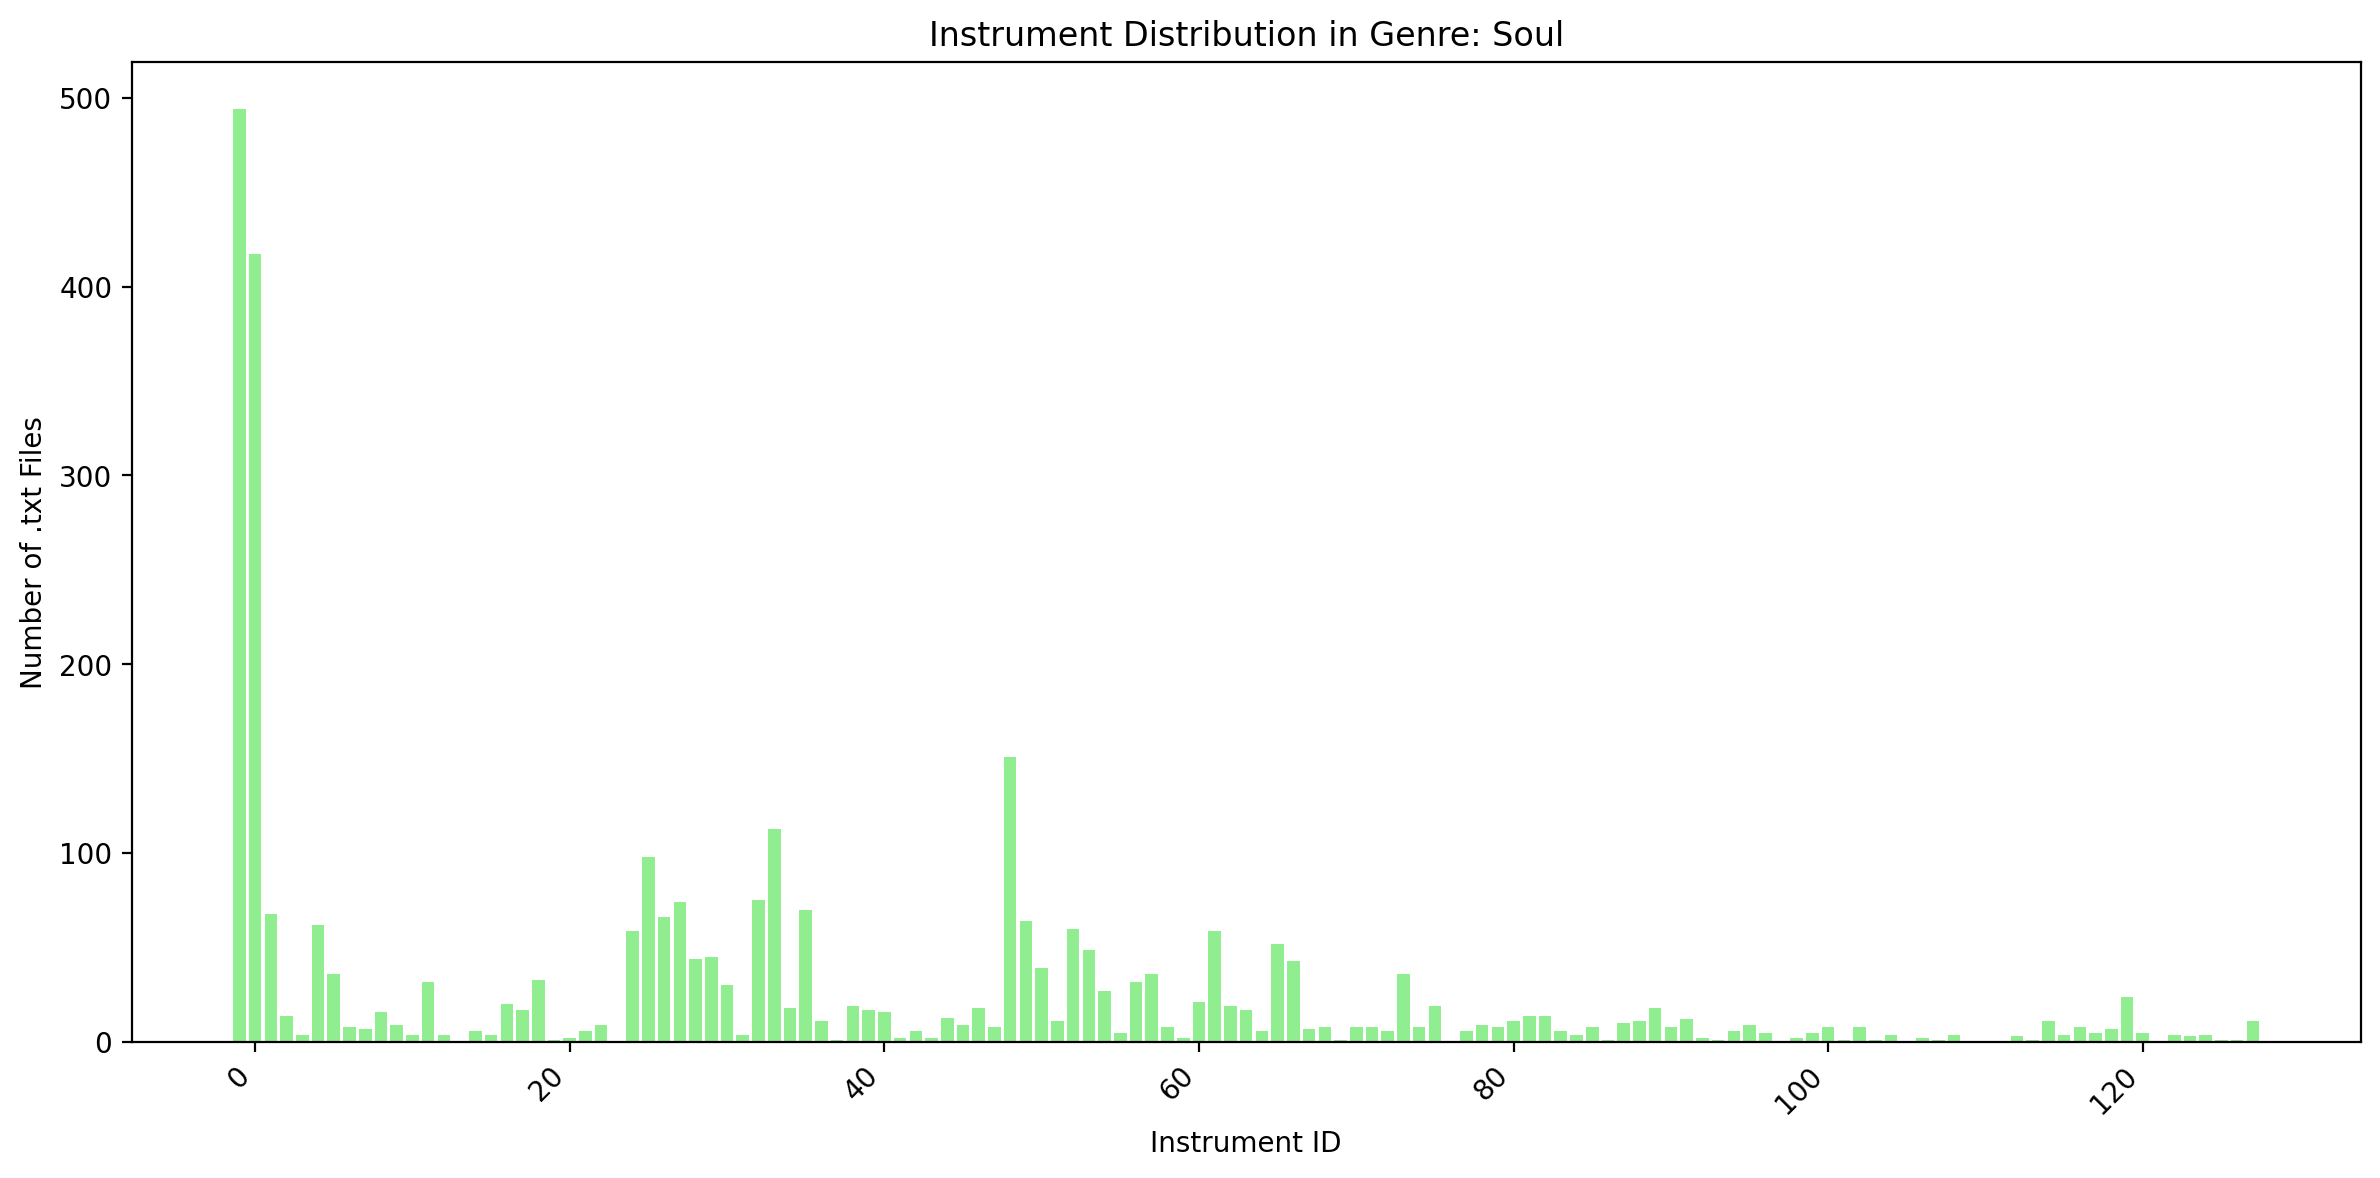

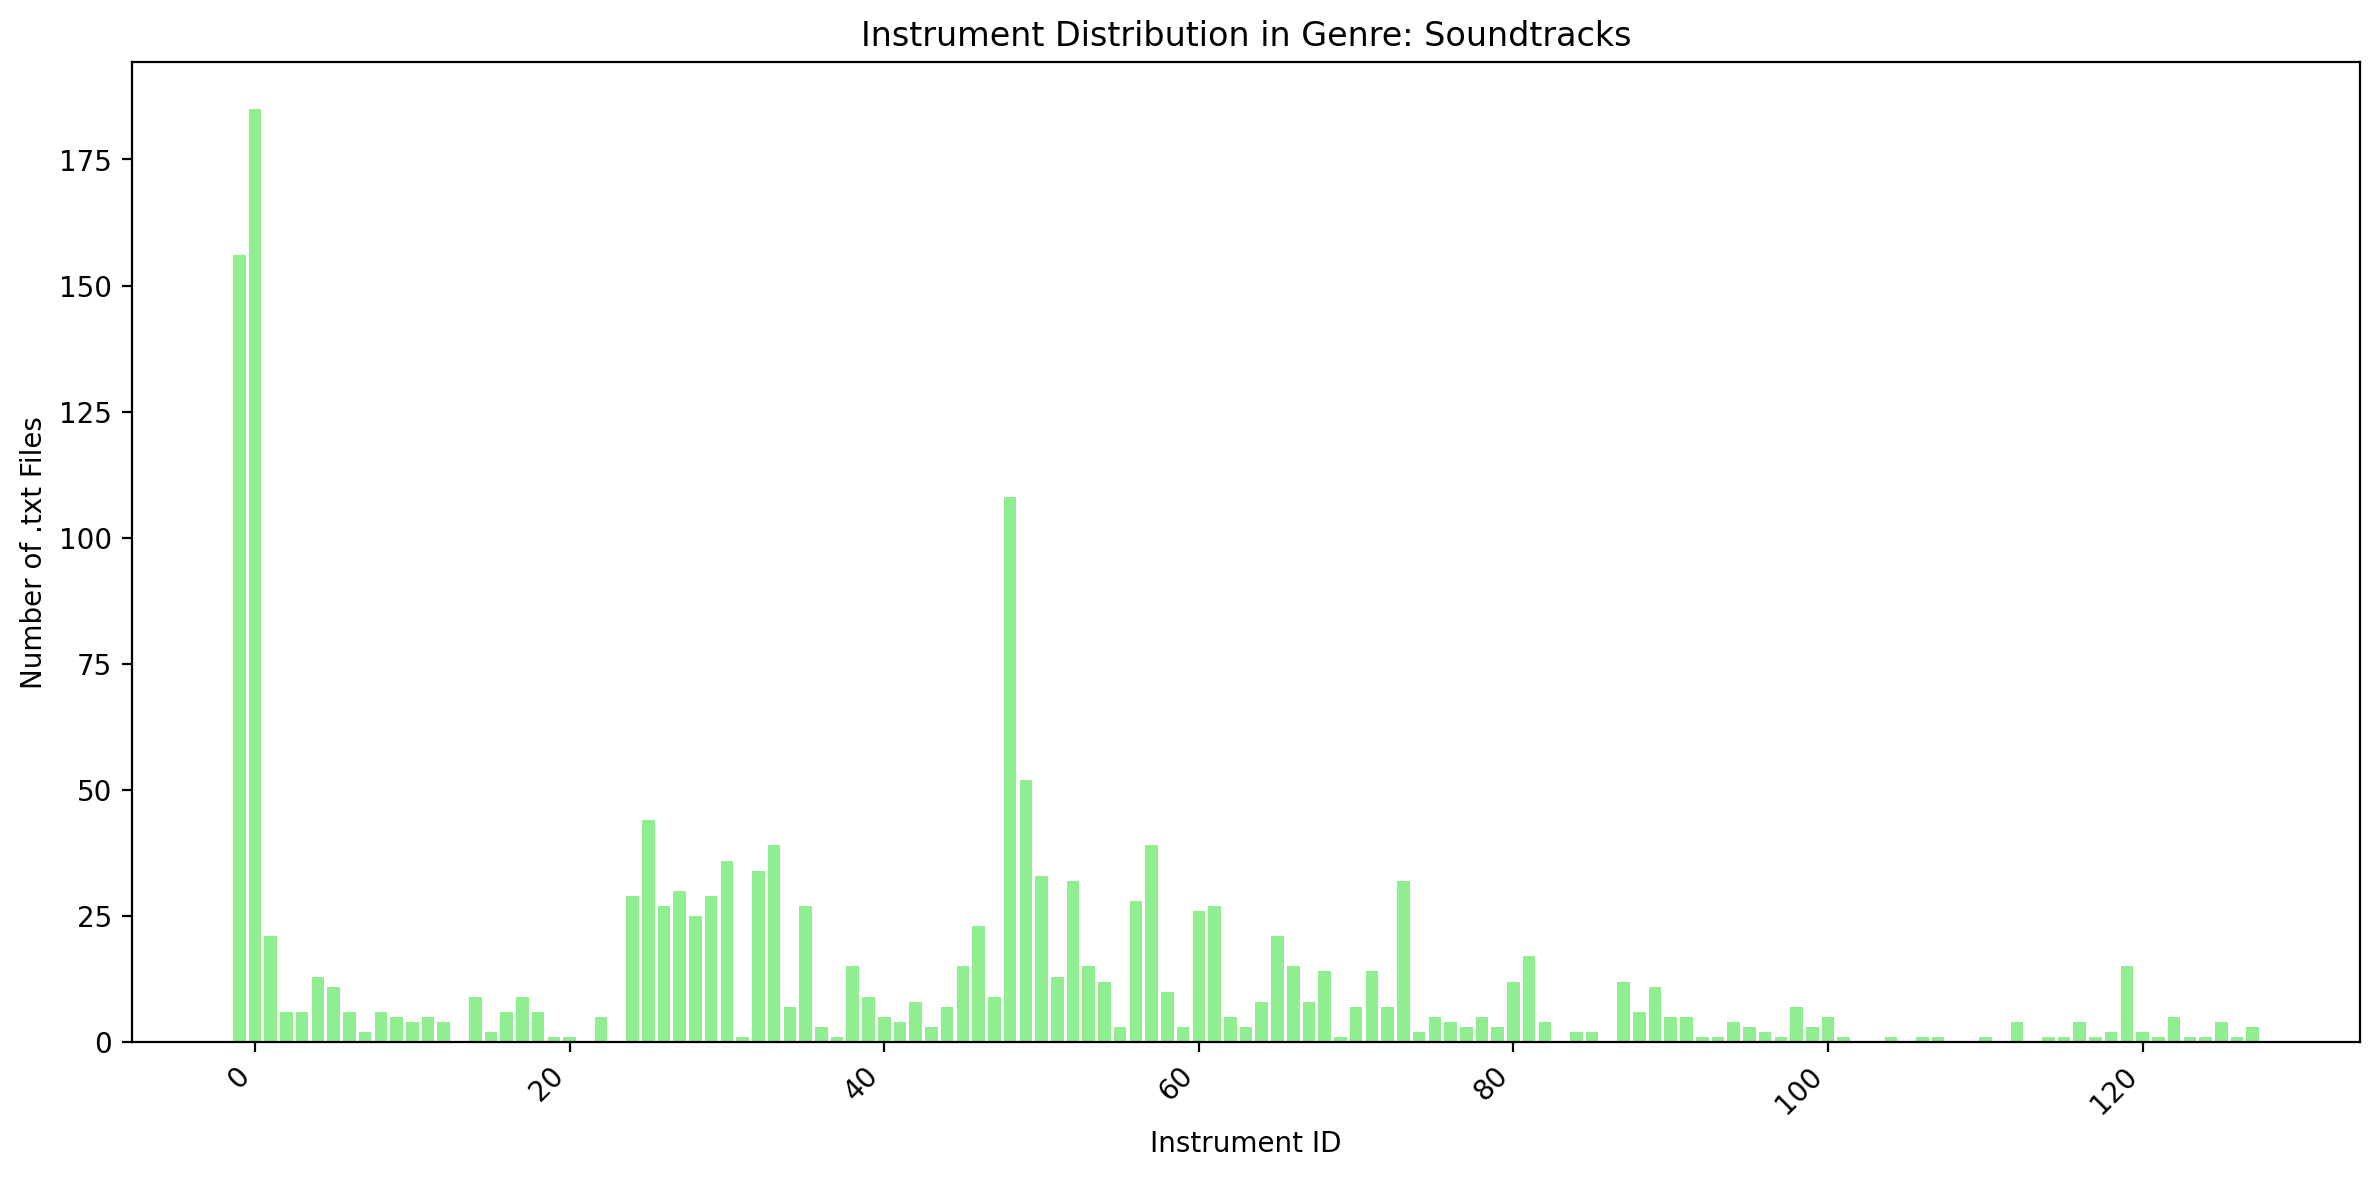

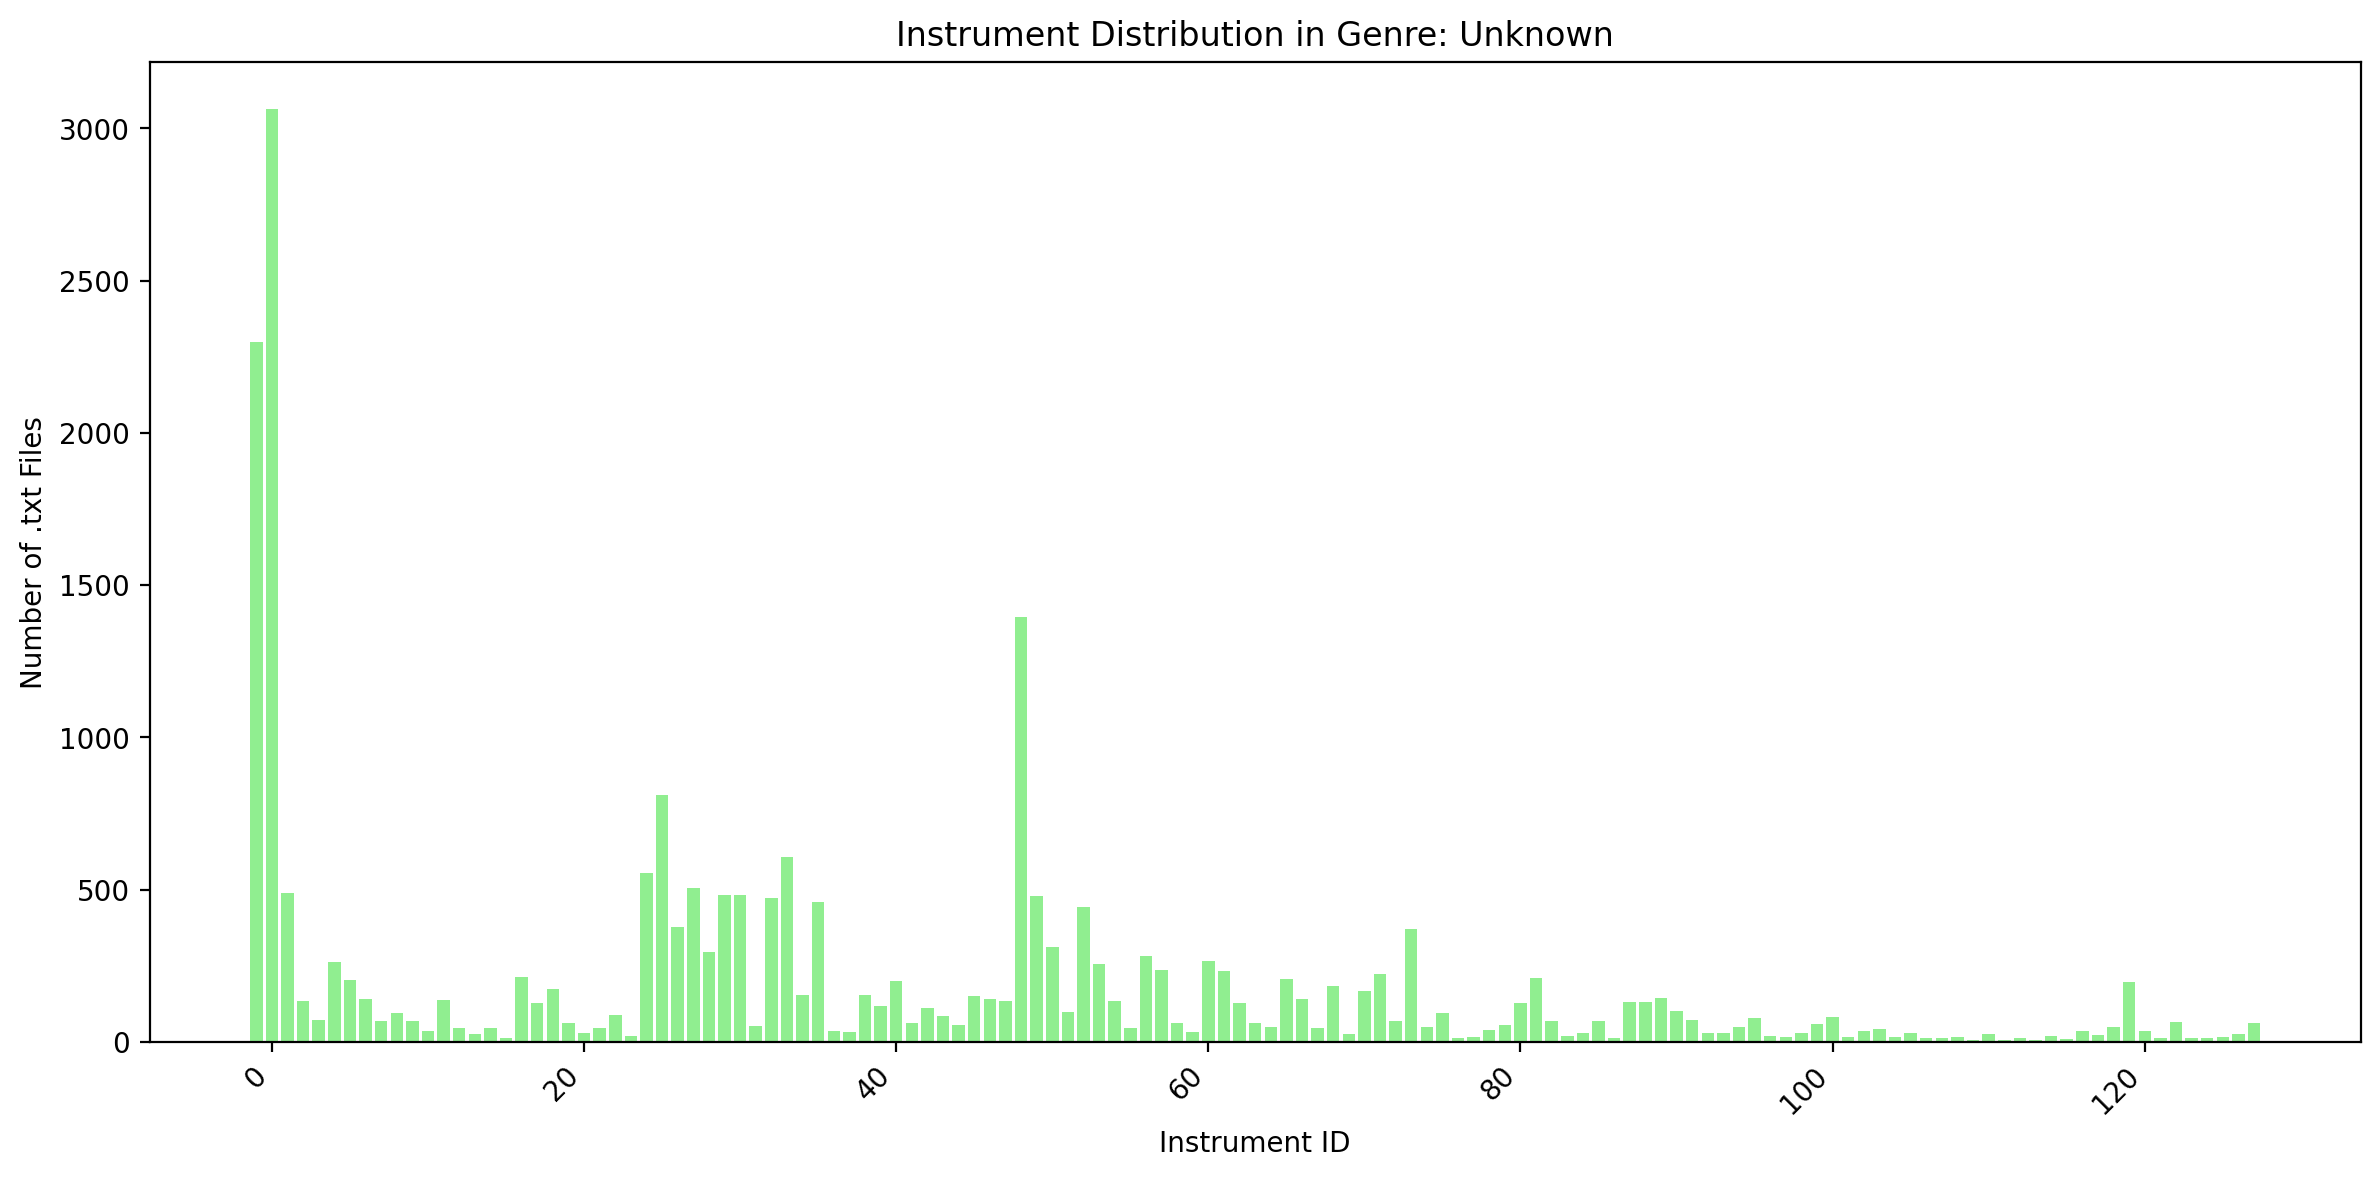

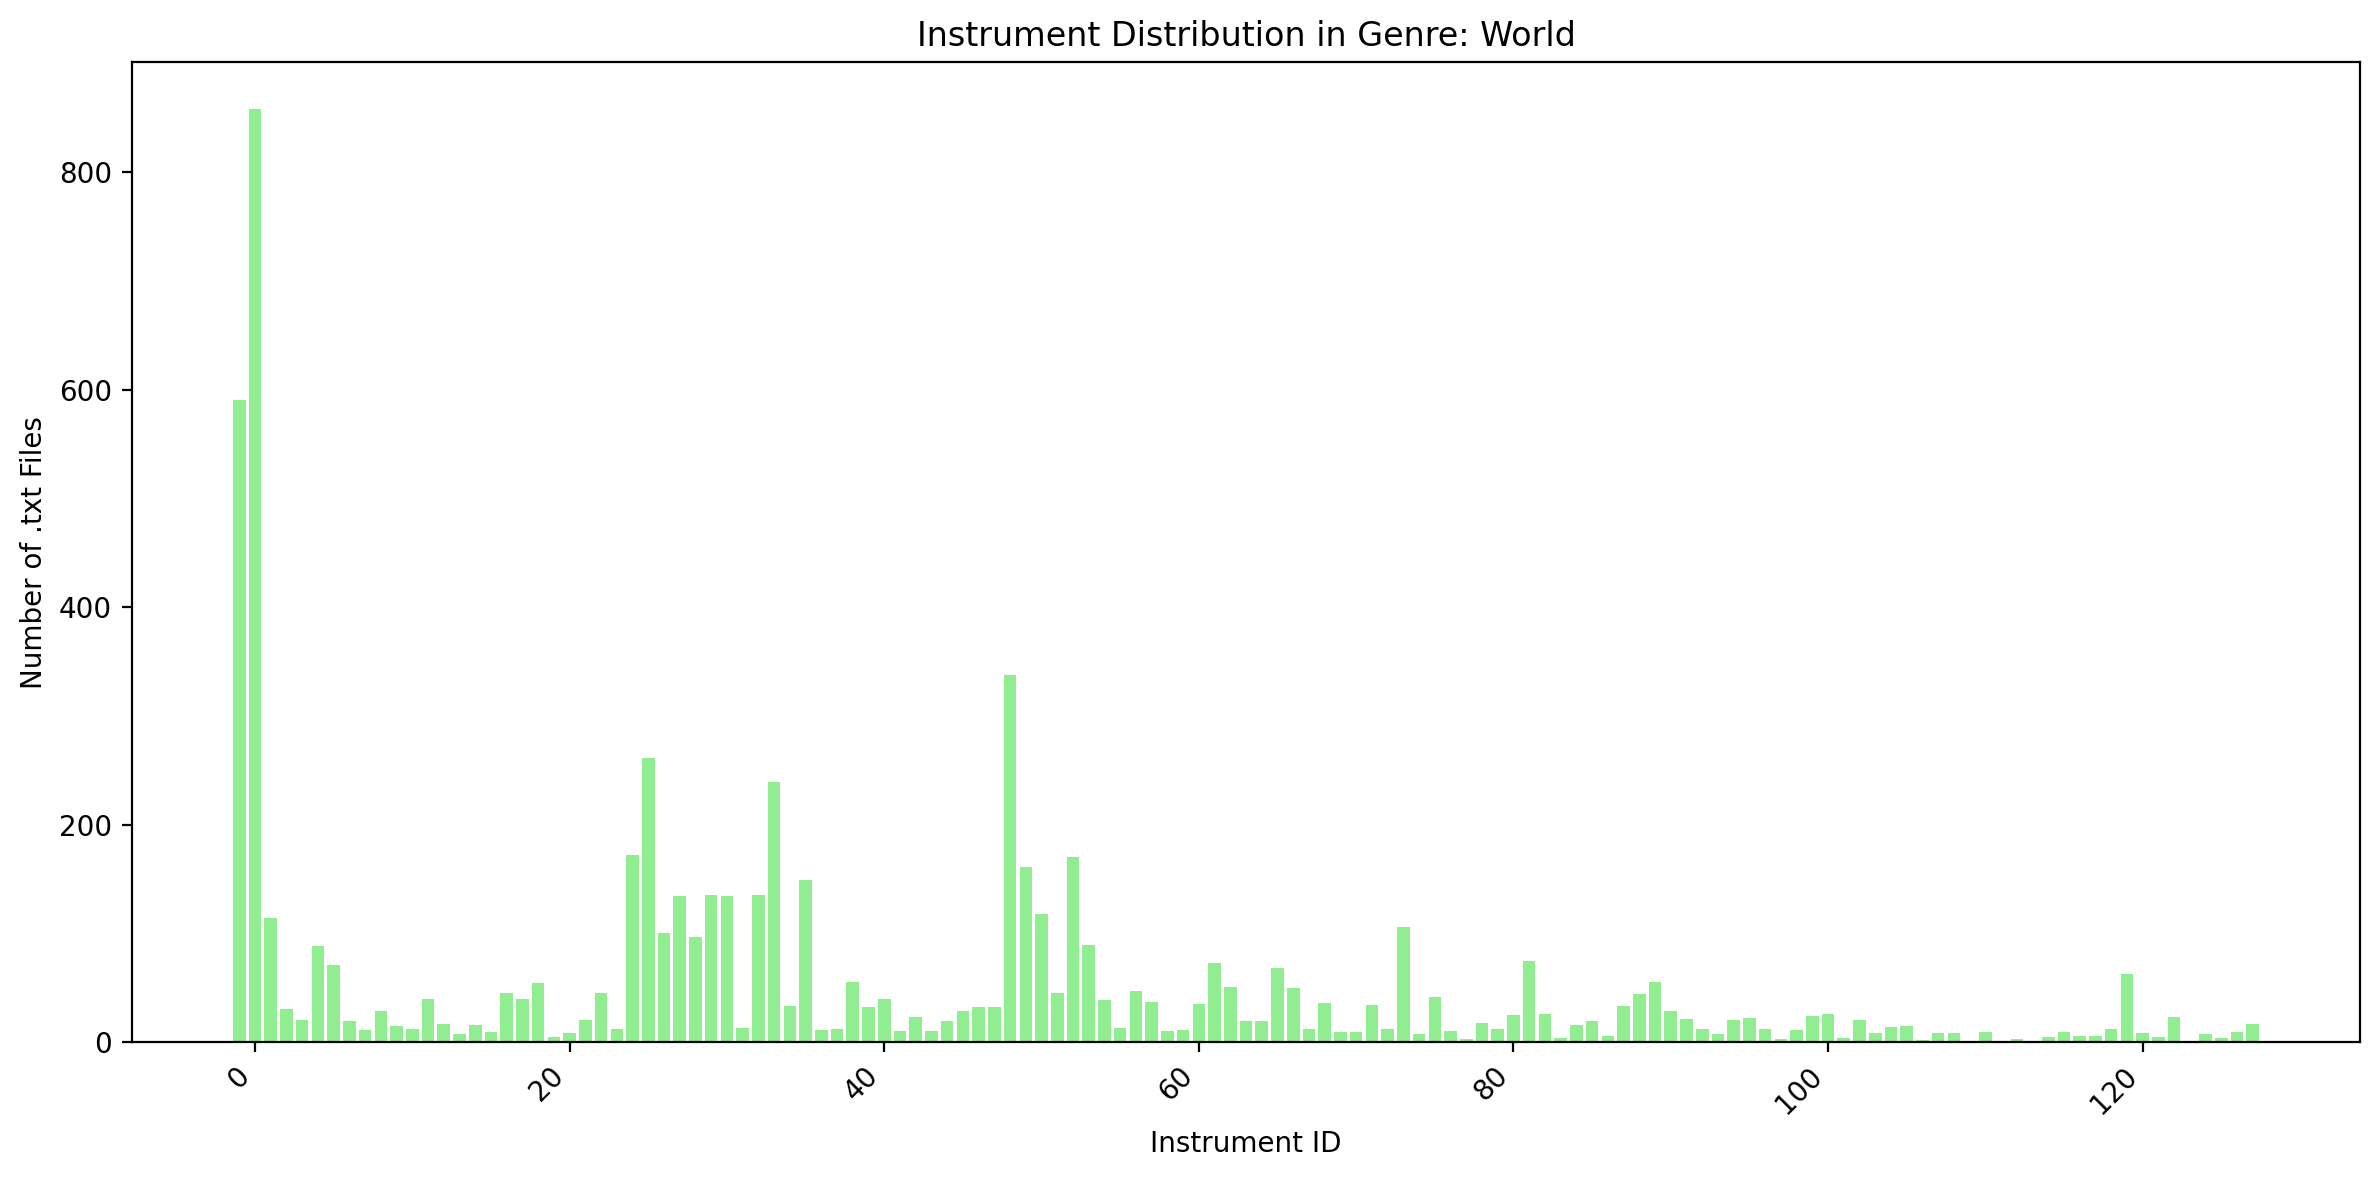

In [18]:
# Plot instrument distribution by genre
plot_genre_instrument_distribution(READY_MIDI_PATH)

In [19]:
genres_t = [d for d in glob.glob(f"{READY_MIDI_PATH}/*") if os.path.isdir(d)]
num_instr_by_genres = {}
for genre in genres_t:
    genre_name = os.path.basename(genre)
    num_instr_by_genres[genre_name] = count_instruments_by_txt_files(genre)
    # instrument_counts = count_instruments_by_txt_files(genre)
with open("num_instr_by_genres.json", "w") as f:
    json.dump(num_instr_by_genres, f)
print(num_instr_by_genres)

{'Ambient': {-1: 172, 0: 352, 1: 45, 2: 16, 3: 14, 4: 38, 5: 22, 6: 8, 7: 6, 8: 19, 9: 8, 10: 5, 11: 16, 12: 3, 13: 1, 14: 5, 15: 2, 16: 19, 17: 3, 18: 16, 19: 15, 20: 1, 21: 8, 22: 11, 23: 2, 24: 54, 25: 82, 26: 41, 27: 25, 28: 20, 29: 23, 30: 25, 31: 2, 32: 62, 33: 58, 34: 6, 35: 50, 36: 4, 37: 2, 38: 14, 39: 11, 40: 38, 41: 15, 42: 16, 43: 12, 44: 6, 45: 14, 46: 28, 47: 17, 48: 167, 49: 79, 50: 30, 51: 11, 52: 48, 53: 15, 54: 11, 55: 5, 56: 30, 57: 38, 58: 9, 59: 7, 60: 27, 61: 15, 62: 6, 63: 10, 64: 4, 65: 22, 66: 15, 67: 5, 68: 26, 69: 2, 70: 16, 71: 24, 72: 14, 73: 50, 74: 7, 75: 6, 76: 5, 77: 1, 78: 7, 79: 10, 80: 8, 81: 14, 82: 6, 83: 1, 84: 1, 85: 1, 86: 1, 87: 5, 88: 17, 89: 19, 90: 8, 91: 8, 92: 2, 93: 1, 94: 3, 95: 5, 96: 5, 97: 1, 98: 5, 99: 6, 100: 4, 101: 1, 102: 2, 103: 1, 105: 1, 106: 3, 107: 1, 108: 2, 109: 2, 110: 1, 112: 3, 113: 1, 114: 3, 115: 1, 116: 4, 117: 1, 118: 1, 119: 16, 120: 4, 121: 3, 122: 3, 123: 1, 124: 2, 125: 2, 126: 5, 127: 4}, 'Blues': {-1: 101, 0: 

In [20]:
print(instrument_counts)

{-1: 11769, 0: 16414, 1: 2232, 2: 647, 3: 351, 4: 1329, 5: 986, 6: 492, 7: 359, 8: 590, 9: 280, 10: 238, 11: 798, 12: 242, 13: 66, 14: 242, 15: 72, 16: 1104, 17: 619, 18: 985, 19: 281, 20: 125, 21: 297, 22: 481, 23: 132, 24: 2800, 25: 4526, 26: 2072, 27: 2891, 28: 1536, 29: 2906, 30: 3378, 31: 245, 32: 2274, 33: 3836, 34: 951, 35: 2405, 36: 258, 37: 197, 38: 746, 39: 548, 40: 989, 41: 269, 42: 456, 43: 278, 44: 327, 45: 543, 46: 562, 47: 517, 48: 5554, 49: 2446, 50: 1564, 51: 499, 52: 2382, 53: 1288, 54: 772, 55: 231, 56: 1137, 57: 981, 58: 232, 59: 142, 60: 853, 61: 1100, 62: 664, 63: 309, 64: 249, 65: 1202, 66: 877, 67: 274, 68: 705, 69: 128, 70: 428, 71: 715, 72: 287, 73: 1527, 74: 193, 75: 513, 76: 82, 77: 95, 78: 228, 79: 232, 80: 561, 81: 1110, 82: 391, 83: 84, 84: 181, 85: 326, 86: 53, 87: 548, 88: 600, 89: 713, 90: 473, 91: 367, 92: 135, 93: 149, 94: 293, 95: 342, 96: 116, 97: 55, 98: 131, 99: 342, 100: 332, 101: 82, 102: 187, 103: 139, 104: 112, 105: 144, 106: 71, 107: 70, 108

In [28]:
import music21

# dick = Counter()
# for num in range(1,9):
#     for txt_file in glob.glob(f"{READY_MIDI_PATH}/**/*_{num}_.txt", recursive=True):
#             base_name = os.path.basename(txt_file)
#             parts = base_name.split("_")
#             if len(parts) > 3:  # Ensure instrument_id exists
#                 try:
#                     instrument_id = int(parts[2])  # Extract instrument_id (assumed numeric)
#                 except ValueError:
#                     instrument_id = -1  # Assign -1 for 'None' or invalid instrument_ids
#                 instrument_counts[instrument_id] += 1
#                 inst_name[parts[1]] += 1
#         print(inst_name)
for num in range(128):
    ins = ""
    try:
        ins = str(music21.instrument.instrumentFromMidiProgram(num))
    except:
        print("Not found num")
    print(f"{num} --> {ins}")

0 --> Piano
1 --> Piano
2 --> Electric Piano
3 --> Piano
4 --> Electric Piano
5 --> Electric Piano
6 --> Harpsichord
7 --> Clavichord
8 --> Celesta
9 --> Glockenspiel
10 --> Glockenspiel
11 --> Vibraphone
12 --> Marimba
13 --> Xylophone
14 --> Tubular Bells
15 --> Dulcimer
16 --> Electric Organ
17 --> Electric Organ
18 --> Electric Organ
19 --> Pipe Organ
20 --> Reed Organ
21 --> Accordion
22 --> Harmonica
23 --> Accordion
24 --> Acoustic Guitar
25 --> Acoustic Guitar
26 --> Electric Guitar
27 --> Electric Guitar
28 --> Electric Guitar
29 --> Electric Guitar
30 --> Electric Guitar
31 --> Electric Guitar
32 --> Acoustic Bass
33 --> Electric Bass
34 --> Electric Bass
35 --> Fretless Bass
36 --> Electric Bass
37 --> Electric Bass
38 --> Electric Bass
39 --> Electric Bass
40 --> Violin
41 --> Viola
42 --> Violoncello
43 --> Contrabass
44 --> StringInstrument
45 --> StringInstrument
46 --> Harp
47 --> Timpani
48 --> StringInstrument
49 --> StringInstrument
50 --> StringInstrument
51 --> Str